# Setting out

## Import packages

In [280]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm
from matplotlib import mlab
from matplotlib.collections import PatchCollection
import geopandas as gp
import shapely
import fiona
from descartes import PolygonPatch
import scipy
from pylab import figure


import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import datasets
import sklearn.metrics as sm


## Set a plot style

In [281]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [282]:
sns.set_style("ticks")
sns.set_context("talk")
sns.despine()

## Import data

In [283]:
if os.path.isfile("air-con-climate-data-july-7-2015.xlsx"):
    filepath = "air-con-climate-data-july-7-2015.xlsx"
    print "loading from file"
else:
    filepath = "http://data.gov.au/dataset/9cb612b2-c303-4fb1-b87b-c987baa7e26b/resource/941dcd1b-a686-4455-9609-ecf6837d786e/download/air-con-climate-data-july-7-2015.xlsx"
    print "loading from the internet"

aircon_data = pd.read_excel(filepath)
print type(aircon_data)
print "done"


loading from file
<class 'pandas.core.frame.DataFrame'>
done


In [284]:
if os.path.isfile("poaDwellings2.csv"):
    PDfilepath = "poaDwellings2.csv"
    print "loading from file"

dwelldf = pd.read_csv(PDfilepath)
print type(dwelldf)
print "done"


loading from file
<class 'pandas.core.frame.DataFrame'>
done


## define functions; shared dictionaries

In [285]:
def setState (pc):
    states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
    if 200 <= pc < 300 or 2600 <= pc <= 2619 or 2900 <= pc <= 2920:
        return states[0]
    elif 1000 <= pc <= 2599 or 2620 <= pc <=2899 or 2921 <= pc <=2999:
        return states[1]
    elif 3000 <= pc < 4000:
        return states[2]
    elif 4000 <= pc < 5000:
        return states[3]
    elif 5000 <= pc < 6000:
        return states[4]
    elif 6000 <= pc < 7000:
        return states[5]
    elif 7000 <= pc < 8000:
        return states[6] 
    elif 800 <= pc < 900:
        return states[7]
    else:
        pass


stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}


def setStateC (pc):
    stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
    if 200 <= pc < 300 or 2600 <= pc <= 2619 or 2900 <= pc <= 2920:
        return stateC["ACT"]
    elif 1000 <= pc <= 2599 or 2620 <= pc <=2899 or 2921 <= pc <=2999:
        return stateC["NSW"]
    elif 3000 <= pc < 4000:
        return stateC["VIC"]
    elif 4000 <= pc < 5000:
        return stateC["QLD"]
    elif 5000 <= pc < 6000:
        return stateC["SA"]
    elif 6000 <= pc < 7000:
        return stateC["WA"]
    elif 7000 <= pc < 8000:
        return stateC["TAS"] 
    elif 800 <= pc < 900:
        return stateC["NT"]




In [286]:
def unzip_zipfile(zipped_file_path, put_it_here="."):
    import zipfile
    zip_of_suburbs = zipfile.ZipFile(zipped_file_path, 'r')
    zip_of_suburbs.extractall(put_it_here)
    zip_of_suburbs.close()


## establish data frame

In [287]:
airdf = aircon_data

stateList = airdf["Postcode"].apply(setState)
airdf["State"] = stateList.values

colourList = airdf["Postcode"].apply(setStateC)
airdf["State colour"] = colourList.values


airdf.head()


,Postcode,Longitude,Latitude,NatHERS Climate zone,Annual cooling hours,Annual heating hours,State,State colour
0,800,130.8,-12.5,1,5377,0,NT,orange
1,801,130.8,-12.5,1,5377,0,NT,orange
2,804,130.8,-12.4,1,5377,0,NT,orange
3,810,130.9,-12.4,1,5377,0,NT,orange
4,811,130.9,-12.4,1,5377,0,NT,orange


In [288]:
dwelldf["Postcode"] = dwelldf["POA"].astype(str).str[:4]

In [289]:
dwelldf["Postcode"] = pd.to_numeric(dwelldf["Postcode"], errors='coerce')

In [290]:
airdf = airdf.merge(dwelldf, how="inner", on='Postcode')

In [291]:
airdf

,Postcode,Longitude,Latitude,NatHERS Climate zone,Annual cooling hours,Annual heating hours,State,State colour,POA,Occupied private dwellings
0,800,130.8,-12.5,1,5377,0,NT,orange,"0800, NT",2100.0
1,810,130.9,-12.4,1,5377,0,NT,orange,"0810, NT",11275.0
2,812,130.9,-12.4,1,5377,0,NT,orange,"0812, NT",6784.0
3,820,130.9,-12.4,1,5377,0,NT,orange,"0820, NT",7545.0
4,822,129.5,-14.1,1,5377,0,NT,orange,"0822, NT",5435.0
5,828,130.9,-12.4,1,5377,0,NT,orange,"0828, NT",391.0
6,829,130.9,-12.4,1,5377,0,NT,orange,"0829, NT",321.0
7,830,131.0,-12.5,1,5377,0,NT,orange,"0830, NT",6289.0
8,832,131.0,-12.5,1,5377,0,NT,orange,"0832, NT",3293.0
9,835,131.0,-12.5,1,5377,0,NT,orange,"0835, NT",2234.0


In [292]:
airdf.head()
airdf["agHeating"] = airdf["Occupied private dwellings"] * airdf["Annual heating hours"]
airdf["agCooling"] = airdf["Occupied private dwellings"] * airdf["Annual cooling hours"]
airdf.head()

,Postcode,Longitude,Latitude,NatHERS Climate zone,Annual cooling hours,Annual heating hours,State,State colour,POA,Occupied private dwellings,agHeating,agCooling
0,800,130.8,-12.5,1,5377,0,NT,orange,"0800, NT",2100.0,0.0,11291700.0
1,810,130.9,-12.4,1,5377,0,NT,orange,"0810, NT",11275.0,0.0,60625675.0
2,812,130.9,-12.4,1,5377,0,NT,orange,"0812, NT",6784.0,0.0,36477568.0
3,820,130.9,-12.4,1,5377,0,NT,orange,"0820, NT",7545.0,0.0,40569465.0
4,822,129.5,-14.1,1,5377,0,NT,orange,"0822, NT",5435.0,0.0,29223995.0


In [293]:


%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)



poa_shp_file_name = "POA_2016_AUST.shp"
poa_zip_file_name = "1270055003_poa_2016_aust_shape.zip"
poa_web_file_path = ("http://data.gov.au/dataset/91e70237-d9d1-4719-a82f-e71b811154c6/resource/"
                 "bf8b5180-fcea-44bd-bd76-af14cc4b0fe0/download/nswlocalitypolygonshp.zip")

In [294]:
# Get the data loaded. This is a bit complicated because it's online as a zip file.
# If we don't have it right now, we need to get it and unzip it.
if os.path.isfile(poa_shp_file_name):
    print "loading from file"
else:
    if os.path.isfile(poa_zip_file_name):
        print "unzipping"
        unzip_zipfile(poa_zip_file_name)
    else:
        import requests
        print "loading from the internet"
        page = requests.get(poa_web_file_path)
        with open(poa_zip_file_name, 'wb') as z:
            z.write(page.content)
        unzip_zipfile(poa_zip_file_name)

print "done"

loading from file
done


In [295]:
poa = gp.GeoDataFrame.from_file(poa_shp_file_name)
poa.head()

,AREASQKM16,POA_CODE16,POA_NAME16,geometry
0,3.1734,0800,0800,"POLYGON ((130.834539712 -12.45798405399995, 13..."
1,23.7902,0810,0810,POLYGON ((130.8471142530001 -12.37754403699995...
2,35.8899,0812,0812,POLYGON ((130.8919169080001 -12.36878576699996...
3,0.6381,0815,0815,"POLYGON ((130.872398607 -12.37654838499998, 13..."
4,39.0462,0820,0820,"POLYGON ((130.834991691 -12.43006229899993, 13..."


In [296]:
      
# def GeoLookup(df1Poa, df2Poa,  df2Geo):
#     for i in df1Poa:
#         if len(df1Poa) < 4:
#             df1Poa = "0"+df1Poa
#         if df1Poa == df2Poa:
#             return df2Geo
    

In [297]:
poa["Postcode"] = pd.to_numeric(poa["POA_CODE16"], errors='coerce')

airdf = airdf.merge(poa, how="inner", on='Postcode')

In [298]:
# poa.geometry.plot()

In [299]:
gp_airdf = gp.GeoDataFrame(airdf)

In [300]:
gp_airdf[gp_airdf.Postcode < 900]

gp_adf_NT = gp_airdf[gp_airdf.Postcode < 900]
gp_adf_NT.head()


,Postcode,Longitude,Latitude,NatHERS Climate zone,Annual cooling hours,Annual heating hours,State,State colour,POA,Occupied private dwellings,agHeating,agCooling,AREASQKM16,POA_CODE16,POA_NAME16,geometry
0,800,130.8,-12.5,1,5377,0,NT,orange,"0800, NT",2100.0,0.0,11291700.0,3.1734,0800,0800,"POLYGON ((130.834539712 -12.45798405399995, 13..."
1,810,130.9,-12.4,1,5377,0,NT,orange,"0810, NT",11275.0,0.0,60625675.0,23.7902,0810,0810,POLYGON ((130.8471142530001 -12.37754403699995...
2,812,130.9,-12.4,1,5377,0,NT,orange,"0812, NT",6784.0,0.0,36477568.0,35.8899,0812,0812,POLYGON ((130.8919169080001 -12.36878576699996...
3,820,130.9,-12.4,1,5377,0,NT,orange,"0820, NT",7545.0,0.0,40569465.0,39.0462,0820,0820,"POLYGON ((130.834991691 -12.43006229899993, 13..."
4,822,129.5,-14.1,1,5377,0,NT,orange,"0822, NT",5435.0,0.0,29223995.0,150783.0188,0822,0822,(POLYGON ((130.8775887600001 -12.5574015179999...


In [301]:
gp_airdf[gp_airdf.State == "NSW"]

gp_adf_NSW = gp_airdf[gp_airdf.State == "NSW"]
gp_adf_NSW.head()


,Postcode,Longitude,Latitude,NatHERS Climate zone,Annual cooling hours,Annual heating hours,State,State colour,POA,Occupied private dwellings,agHeating,agCooling,AREASQKM16,POA_CODE16,POA_NAME16,geometry
70,2386,148.9,-30.1,8,1824,1170,NSW,lightskyblue,"2386, NSW",150.0,175500.0,273600.0,1979.4029,2386,2386,"POLYGON ((148.674098306 -30.01956424599996, 14..."
71,2388,149.0,-30.4,8,1824,1170,NSW,lightskyblue,"2388, NSW",1216.0,1422720.0,2217984.0,6699.0871,2388,2388,"POLYGON ((149.022122813 -30.32095322199996, 14..."
72,2390,149.8,-30.4,8,1824,1170,NSW,lightskyblue,"2390, NSW",3291.0,3850470.0,6002784.0,4217.1071,2390,2390,"POLYGON ((149.57103237 -30.27511399599996, 149..."
73,2397,149.7,-29.9,8,1824,1170,NSW,lightskyblue,"2397, NSW",168.0,196560.0,306432.0,1694.9079,2397,2397,"POLYGON ((149.353434007 -29.78345718199995, 14..."
74,2399,150.2,-29.4,8,1824,1170,NSW,lightskyblue,"2399, NSW",330.0,386100.0,601920.0,806.3755,2399,2399,POLYGON ((150.0408569760001 -29.46053899799995...


In [302]:
# these are cross-border postcodes and overseas territories

interpoa = [4825,872,2540,2540,2611,2611,3500,3585,3586,3644,3644,3707,
           2406,2540,2611,4380,4377,3691,2899,6798]
interpoa[1]

872

# Initial Tests

## H/C scatter

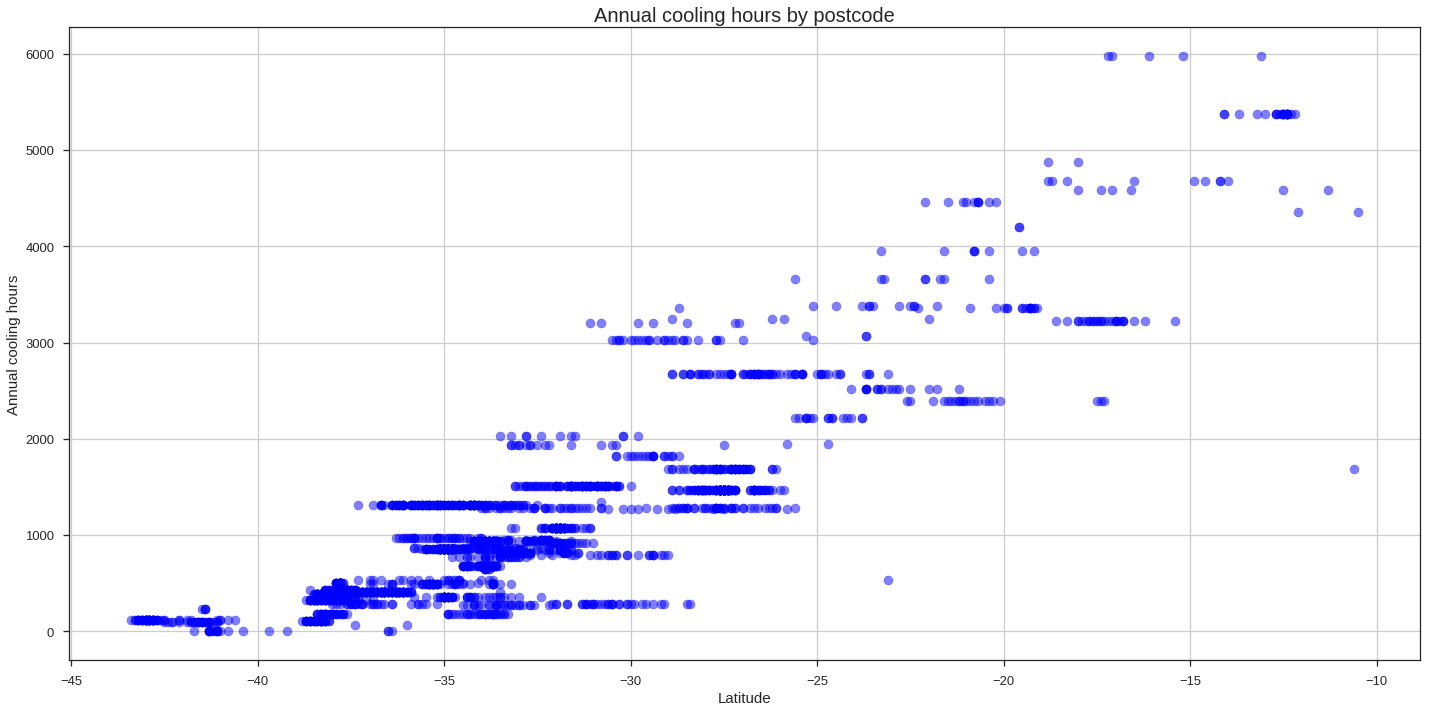

In [303]:
x=aircon_data["Latitude"]
y=aircon_data["Annual cooling hours"]

fig, ax = plt.subplots()
ax.scatter(x, y , c="b", alpha=0.5)
ax.set_ylabel("Annual cooling hours", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Annual cooling hours by postcode', fontsize=20)

ax.grid(True)
fig.tight_layout()

plt.show()


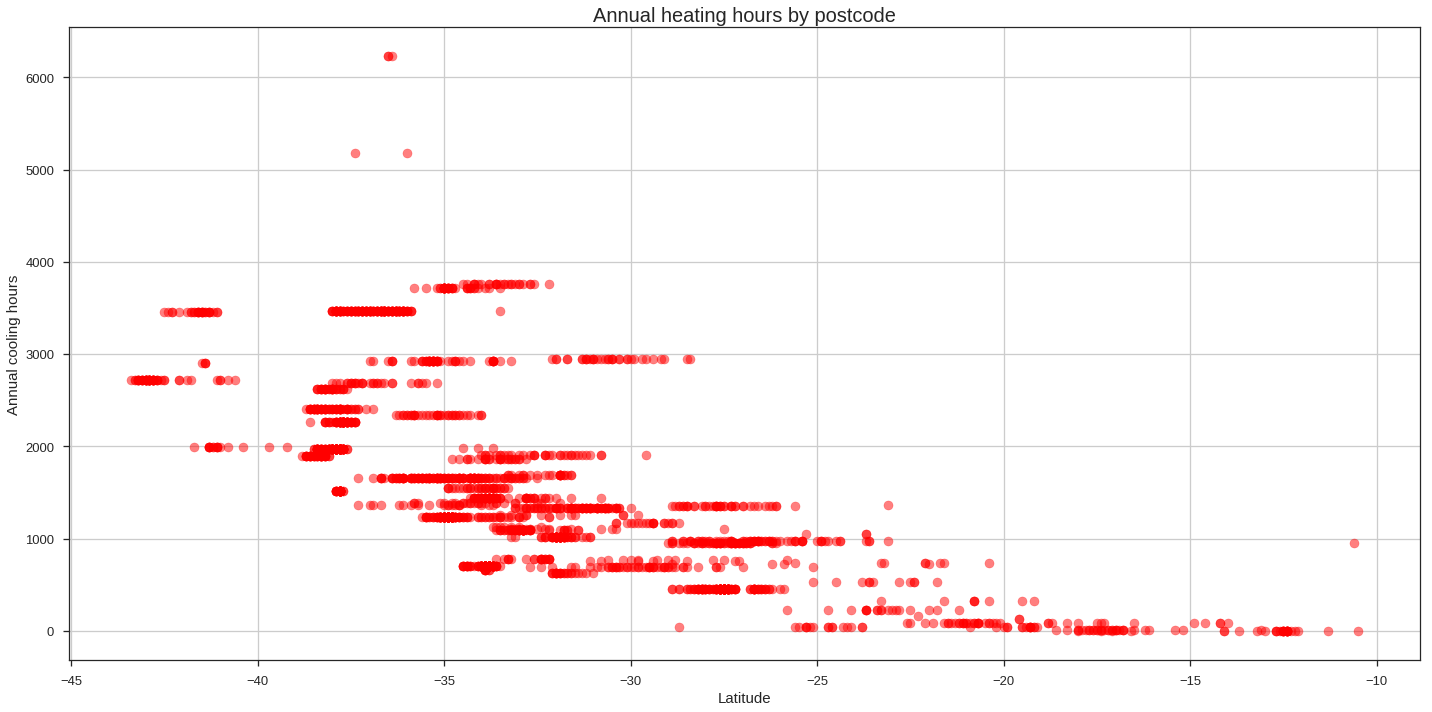

In [304]:
x=aircon_data["Latitude"]
y=aircon_data["Annual heating hours"]

fig, ax = plt.subplots()
ax.scatter(x, y , c="r", alpha=0.5)
ax.set_ylabel("Annual cooling hours", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Annual heating hours by postcode', fontsize=20)

ax.grid(True)
fig.tight_layout()

plt.show()


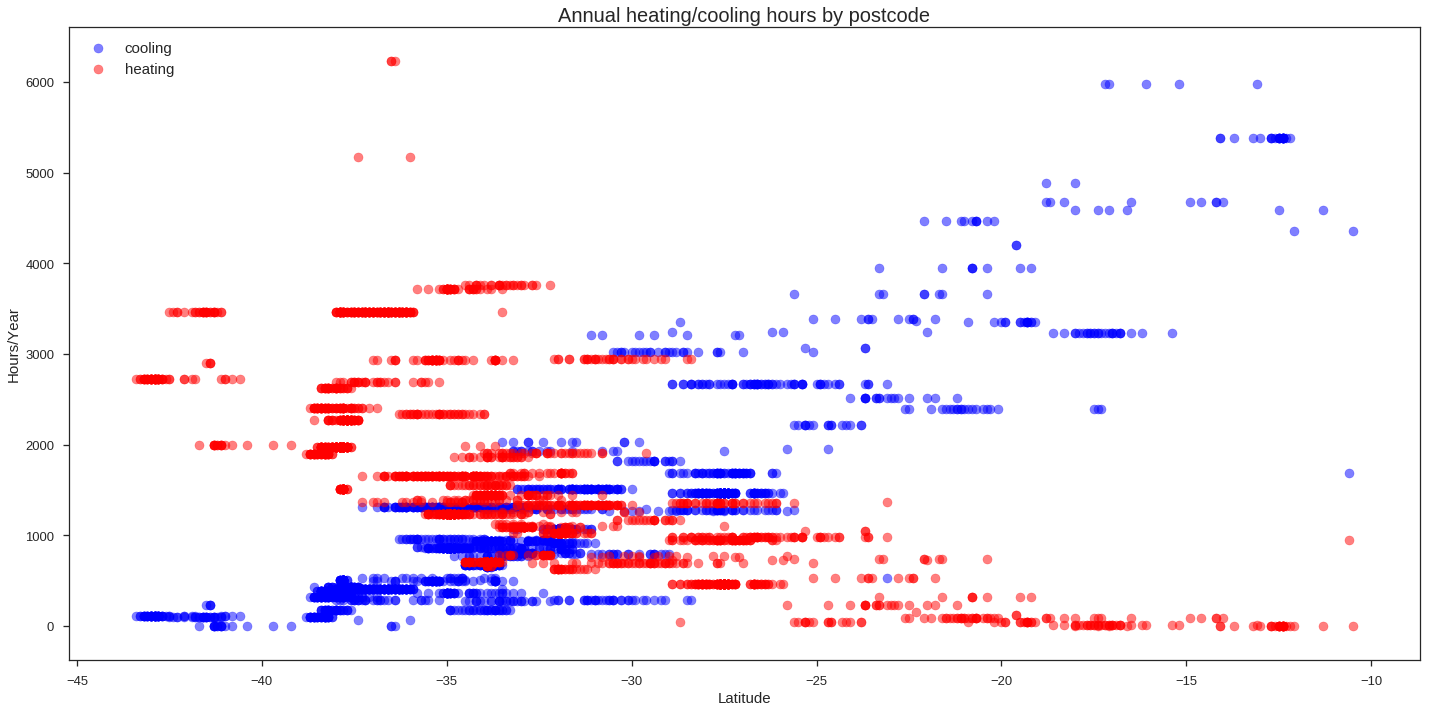

In [305]:
fig, ax = plt.subplots()
ax.scatter(aircon_data["Latitude"], aircon_data["Annual cooling hours"],  c = "blue", label = "cooling", alpha=0.5)
ax.scatter(aircon_data["Latitude"], aircon_data["Annual heating hours"],  c = "red", label = "heating", alpha=0.5)
ax.set_ylabel("Hours/Year", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Annual heating/cooling hours by postcode', fontsize=20)
plt.legend(loc='upper left', prop={"size":15});
fig.tight_layout()




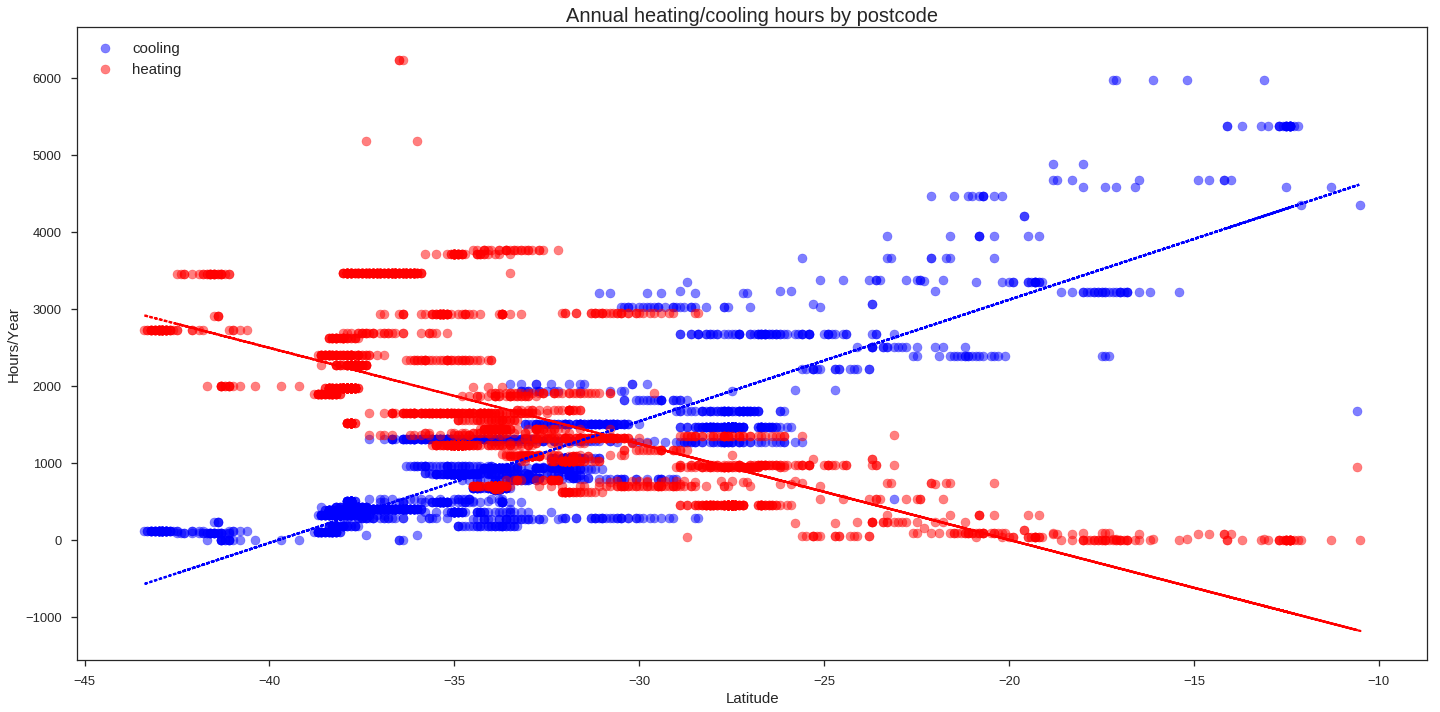

In [306]:
fig, ax = plt.subplots()
ax.scatter(aircon_data["Latitude"], aircon_data["Annual cooling hours"],  c = "blue", label = "cooling", alpha=0.5)
ax.scatter(aircon_data["Latitude"], aircon_data["Annual heating hours"],  c = "red", label = "heating", alpha=0.5)
ax.set_ylabel("Hours/Year", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Annual heating/cooling hours by postcode', fontsize=20)
plt.legend(loc='upper left', prop={"size" : 15});

fig.tight_layout()


tC = np.polyfit(aircon_data["Latitude"], aircon_data["Annual cooling hours"], 1)
pC = np.poly1d(tC)
plt.plot(aircon_data["Latitude"],pC(aircon_data["Latitude"]),"b:")

tH = np.polyfit(aircon_data["Latitude"], aircon_data["Annual heating hours"], 1)
pH = np.poly1d(tH)
plt.plot(aircon_data["Latitude"],pH(aircon_data["Latitude"]), "r:")
         



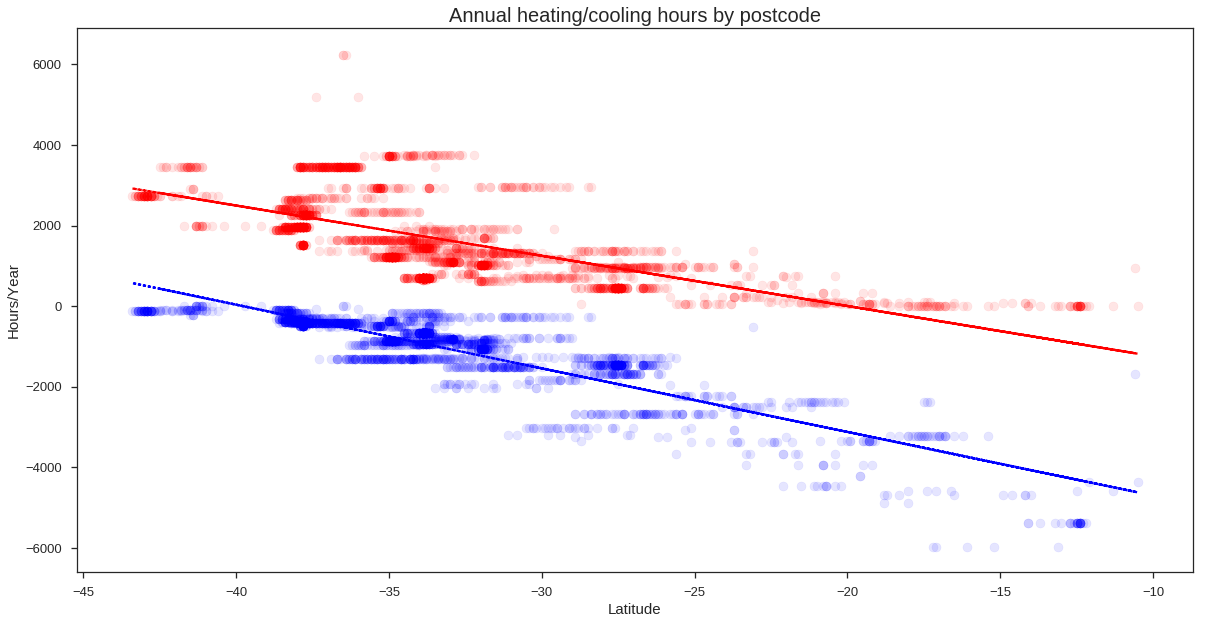

In [307]:

fig, ax = plt.subplots()
ax.set_ylabel("Hours/Year", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Annual heating/cooling hours by postcode', fontsize=20)

y = aircon_data["Latitude"]

plt.scatter(y, -aircon_data["Annual cooling hours"],  color = 'b', alpha=0.1)
plt.scatter(y, aircon_data["Annual heating hours"], color = 'r', alpha=0.1)

tC = np.polyfit(aircon_data["Latitude"], aircon_data["Annual cooling hours"], 1)
pC = np.poly1d(-tC)
plt.plot(aircon_data["Latitude"],pC(aircon_data["Latitude"]),"b:")

tH = np.polyfit(aircon_data["Latitude"], aircon_data["Annual heating hours"], 1)
pH = np.poly1d(tH)
plt.plot(aircon_data["Latitude"],pH(aircon_data["Latitude"]), "r:")

plt.show()

## Barcharts

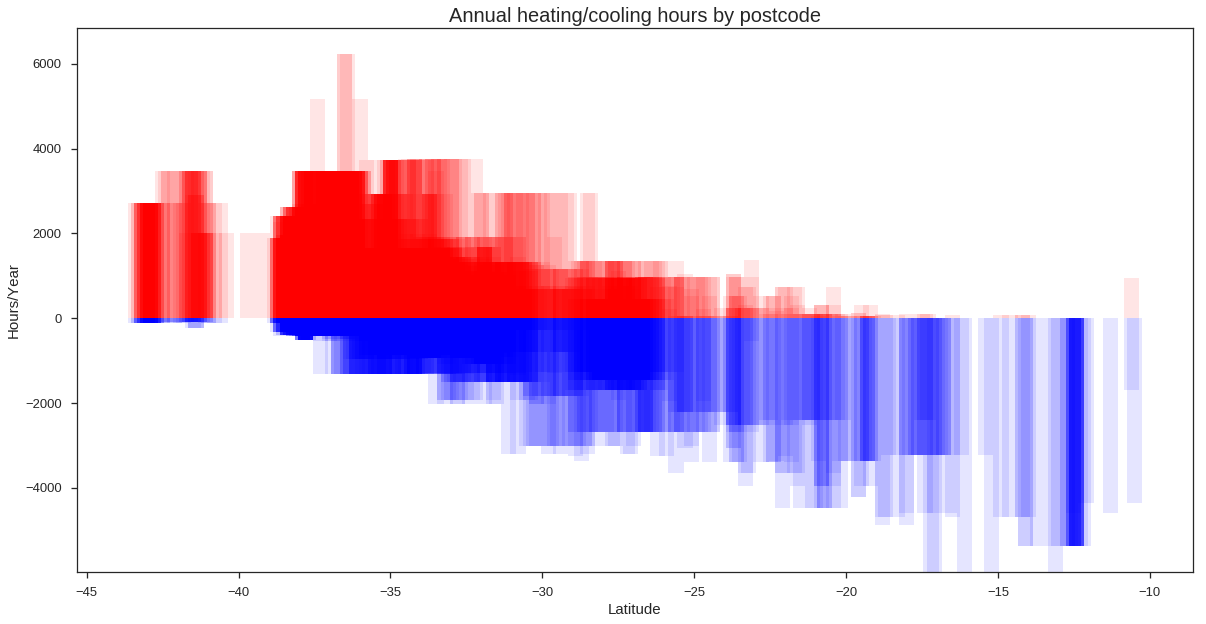

In [308]:

fig, ax = plt.subplots()
ax.set_ylabel("Hours/Year", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Annual heating/cooling hours by postcode', fontsize=20)

y = aircon_data["Latitude"]

plt.bar(y, -aircon_data["Annual cooling hours"],  color = 'b', width = 0.5, alpha=0.1)
plt.bar(y, aircon_data["Annual heating hours"], color = 'r', width = 0.5, alpha=0.1)
plt.show()

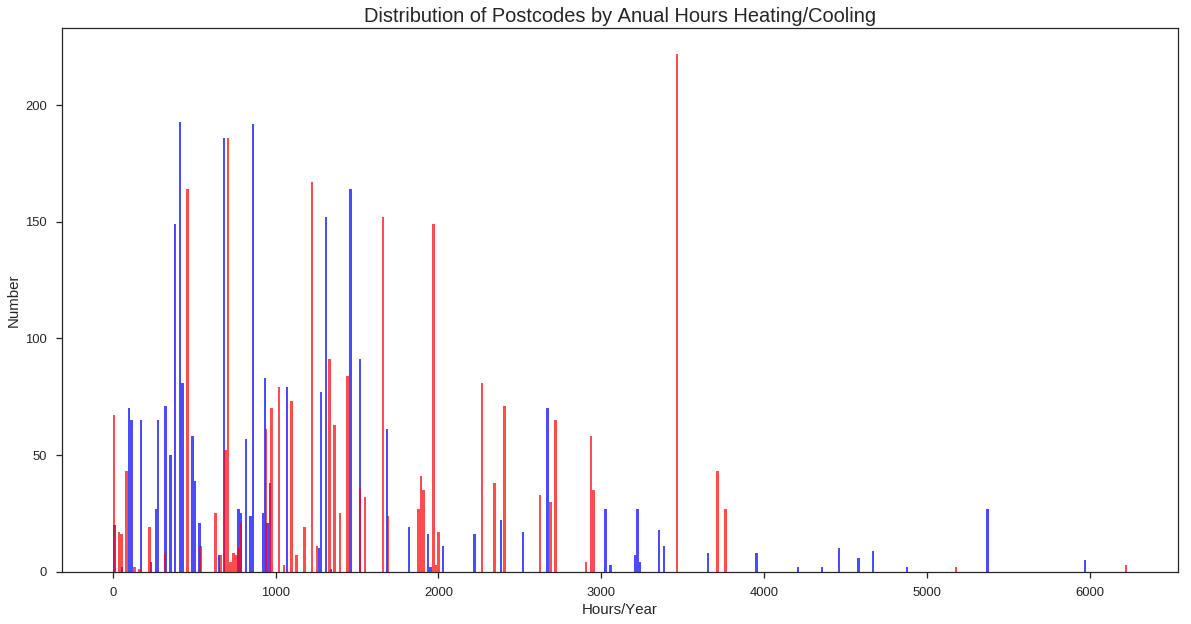

In [309]:
fig, ax = plt.subplots()
ax.set_ylabel("Number", fontsize=15)
ax.set_xlabel("Hours/Year", fontsize=15)
ax.set_title('Distribution of Postcodes by Anual Hours Heating/Cooling', fontsize=20)

y = aircon_data["Latitude"]

plt.hist( aircon_data["Annual cooling hours"], bins =400,  color = 'b', alpha=0.7)
plt.hist( aircon_data["Annual heating hours"], bins = 400, color = 'r', alpha=0.7)
plt.show()

In [310]:
# # Back-to-back hist working

# def bihist(y1, y2, nbins=10, h=None):
#         '''
#         Bihistogram.
#         h is an axis handle. If not present, a new figure is created.
#         '''
#         if h is None: h = figure().add_subplot(111)
#         xmin = scipy.floor(scipy.minimum(y1.min(), y2.min()))
#         xmax = scipy.ceil(scipy.maximum(y1.max(), y2.max()))
#         bins = scipy.linspace(xmin, xmax, nbins)
#         n1, bins1, patch1 = h.hist(y1, bins)
#         n2, bins2, patch2 = h.hist(y2, bins)
#         # set ymax:
#         ymax = 0
#         for i in patch1:
#                 height = i.get_height()
#                 if height > ymax: ymax = height
#         # invert second histogram and set ymin:
#         ymin = 0
#         for i in patch2:
#                 height = i.get_height()
#                 height = -height
#                 i.set_height(height)
#                 if height < ymin: ymin = height
#         h.set_ylim(ymin*1.1, ymax*1.1)          
#         h.figure.canvas.draw()

# bihist(aircon_data["Annual heating hours"], aircon_data["Annual cooling hours"], nbins = 100) 

In [311]:
sorted_aircon = aircon_data.sort_values("Latitude", axis = 0, ascending = True)
sorted_aircon.head()

,Postcode,Longitude,Latitude,NatHERS Climate zone,Annual cooling hours,Annual heating hours,State,State colour
1045,7150,147.1,-43.4,26,113,2723,TAS,g
1040,7112,147.1,-43.3,26,113,2723,TAS,g
1043,7117,147.0,-43.3,26,113,2723,TAS,g
1039,7109,146.5,-43.2,26,113,2723,TAS,g
1042,7116,146.9,-43.2,26,113,2723,TAS,g


In [312]:
# # Back-to-back hist working
# fig, ax = plt.subplots()
# ax.set_ylabel("Hours/Year", fontsize=15)
# ax.set_xlabel("Latitude", fontsize=15)
# ax.set_title('Annual heating/cooling hours by postcode', fontsize=20)


# x = sorted_aircon["Latitude"]


# maxH = max(sorted_aircon["Annual heating hours"])
# maxC = max(sorted_aircon["Annual cooling hours"])

# yLabels = [maxC, "0", maxH]
# yPos = [-maxC, "0", maxH]

# xPos = np.arange(len(x))
# xPos = [i for i in xPos]
# # xPos10 = len(x)/10
# # xLabels = sorted_aircon["Latitude"][xPos10]
# # xPos10 = np.arange(xPos10)



# # xLabels = map(sorted_aircon["Latitude"]()

# # x = [i for i in aircon_data["Latitude"]]
# # x = [i for i in range(len(y))]
# # x = [i for i in range(len(y))]

# plt.yticks(yPos, yLabels)
# # plt.xticks(xPos10, xLabels)
# plt.bar(xPos, -sorted_aircon["Annual cooling hours"],  color = 'b', alpha=0.5)
# plt.bar(xPos, sorted_aircon["Annual heating hours"], color = 'r', alpha=0.5)
# plt.show()

## 3D tests
Working.

In [313]:
# # 3D working


# # set up a figure twice as wide as it is tall
# fig = plt.figure(figsize=plt.figaspect(0.5))

# #===============
# #  First subplot
# #===============
# # set up the axes for the first plot
# ax = fig.add_subplot(1, 2, 1, projection='3d')

# # plot a 3D surface like in the example mplot3d/surface3d_demo
# X = aircon_data["Longitude"]
# Y = aircon_data["Latitude"]
# # X, Y = np.meshgrid(X, Y)
# # R = np.sqrt(X**2 + Y**2)
# Z = aircon_data["Annual heating hours"]
# # Z,bx,by = np.histogram2d(X,Y,bins=20,weights = Z)
# # X,Y = np.meshgrid(bx,by)
# # surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.inferno,
# #                        linewidth=0, antialiased=False)
# # ax.set_zlim(-1.01, 1.01)
# # fig.colorbar(surf, shrink=0.5, aspect=10)
# cmcw = plt.cm.get_cmap("coolwarm")
# c = np.abs(Z)
# ax.scatter(X, Y, zs = Z, c=c, cmap="coolwarm")
# # ax.plot_surface(X, Y, Z)


# # #===============
# # # Second subplot
# # #===============
# # # # set up the axes for the second plot
# ax = fig.add_subplot(1, 2, 2, projection='3d')

# # # # plot a 3D wireframe like in the example mplot3d/wire3d_demo
# # # X, Y, Z = get_test_data(0.05)
# # ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10, color = "r"  )
# ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.inferno,
#                        linewidth=0, antialiased=False)

# plt.show()

In [314]:
# from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
# from matplotlib import cm


# # set up a figure twice as wide as it is tall
# fig = plt.figure(figsize=plt.figaspect(0.5))

# #===============
# #  First subplot
# #===============
# # set up the axes for the first plot
# ax = fig.add_subplot(1, 2, 1, projection='3d')

# # plot a 3D surface like in the example mplot3d/surface3d_demo
# # X = airdf["Longitude"][airdf["State"]=="NSW"]
# # Y = airdf["Latitude"][airdf["State"]=="NSW"]
# X = airdf["Longitude"]
# Y = airdf["Latitude"]
# # X, Y = np.meshgrid(X, Y)
# # R = np.sqrt(X**2 + Y**2)
# Z = airdf["Annual heating hours"]-airdf["Annual cooling hours"]

# # Z = airdf["Annual heating hours"][airdf["State"]=="NSW"]
# # Z,bx,by = np.histogram2d(X,Y,bins=20,weights = Z)

# # surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.inferno,
# #                        linewidth=0, antialiased=False)
# # ax.set_zlim(-1.01, 1.01)
# # fig.colorbar(surf, shrink=0.5, aspect=10)
# cmcw = plt.cm.get_cmap("coolwarm")
# c = Z
# ax.scatter(X, Y, zs = Z, c=c, cmap="coolwarm")
# # ax.plot_surface(X, Y, Z)


# # #===============
# # # Second subplot
# # #===============
# # # # set up the axes for the second plot
# ax = fig.add_subplot(1, 2, 2, projection='3d')

# # # # plot a 3D wireframe like in the example mplot3d/wire3d_demo
# # # X, Y, Z = get_test_data(0.05)
# # X,Y = np.meshgrid(X,Y)
# # # ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10, color = "r"  )
# # ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.inferno,
# #                        linewidth=0, antialiased=False)
# # ax.set_zlim(-1.01, 1.01)

# ax.plot_trisurf(X, Y, Z, cmap="coolwarm")


# plt.show()

In [315]:
# from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
# from matplotlib import cm


# # set up a figure twice as wide as it is tall
# fig = plt.figure(figsize=plt.figaspect(0.5))

# #===============
# #  First subplot
# #===============
# # set up the axes for the first plot
# ax = fig.add_subplot(1, 2, 1, projection='3d')

# # plot a 3D surface like in the example mplot3d/surface3d_demo
# # X = airdf["Longitude"][airdf["State"]=="NSW"]
# # Y = airdf["Latitude"][airdf["State"]=="NSW"]
# X = airdf["Longitude"]
# Y = airdf["Latitude"]
# # X, Y = np.meshgrid(X, Y)
# # R = np.sqrt(X**2 + Y**2)
# Z = airdf["Annual heating hours"]-airdf["Annual cooling hours"]

# # Z = airdf["Annual heating hours"][airdf["State"]=="NSW"]
# # Z,bx,by = np.histogram2d(X,Y,bins=20,weights = Z)

# # surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.inferno,
# #                        linewidth=0, antialiased=False)
# # ax.set_zlim(-1.01, 1.01)
# # fig.colorbar(surf, shrink=0.5, aspect=10)
# cmcw = plt.cm.get_cmap("coolwarm")
# c = Z
# ax.scatter(X, Y, zs = Z, c=c, cmap="coolwarm")
# # ax.plot_surface(X, Y, Z)


# # #===============
# # # Second subplot
# # #===============
# # # # set up the axes for the second plot
# ax = fig.add_subplot(1, 2, 2, projection='3d')

# # # # plot a 3D wireframe like in the example mplot3d/wire3d_demo
# # # X, Y, Z = get_test_data(0.05)
# # X,Y = np.meshgrid(X,Y)
# # # ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10, color = "r"  )
# # ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.inferno,
# #                        linewidth=0, antialiased=False)
# # ax.set_zlim(-1.01, 1.01)

# ax.plot_surface(X, Y, Z, cmap="coolwarm")


# plt.show()

# state 


In [316]:
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']

## state scater


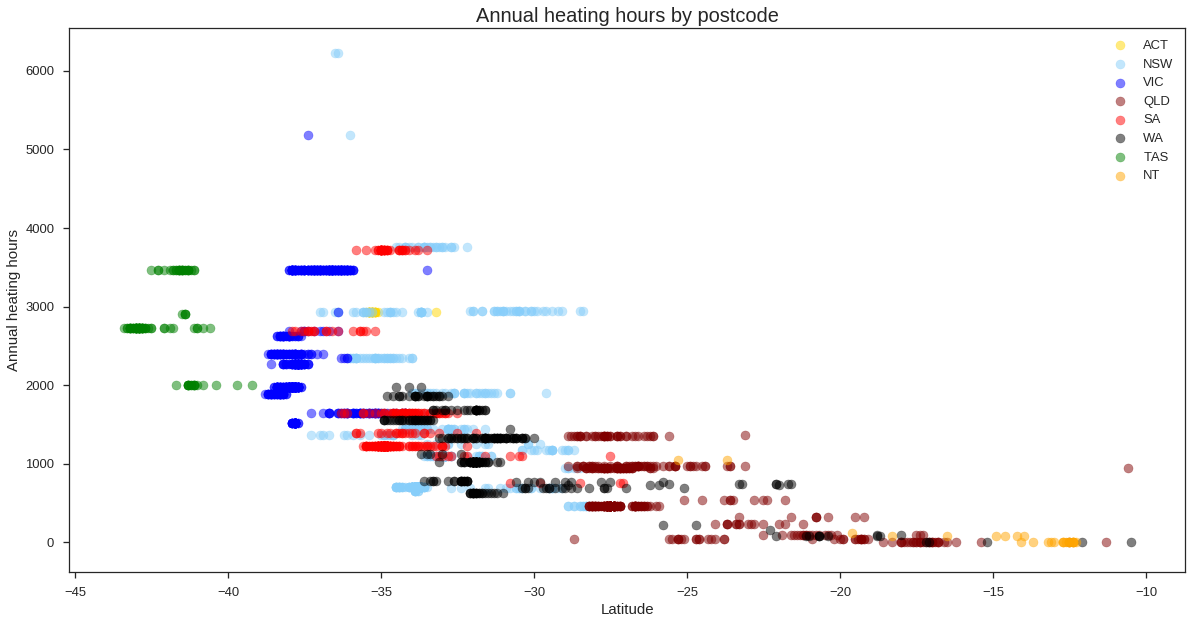

In [317]:

fig, ax = plt.subplots()
x = airdf["Latitude"]
y = airdf["Annual heating hours"]

for state in states:
    ax.scatter(x[state_vector==state],y[state_vector==state],color=stateC[state],label = state,  alpha = 0.5)
 

ax.set_ylabel("Annual heating hours", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Annual heating hours by postcode', fontsize=20)

plt.legend(loc='upper right');

plt.show()

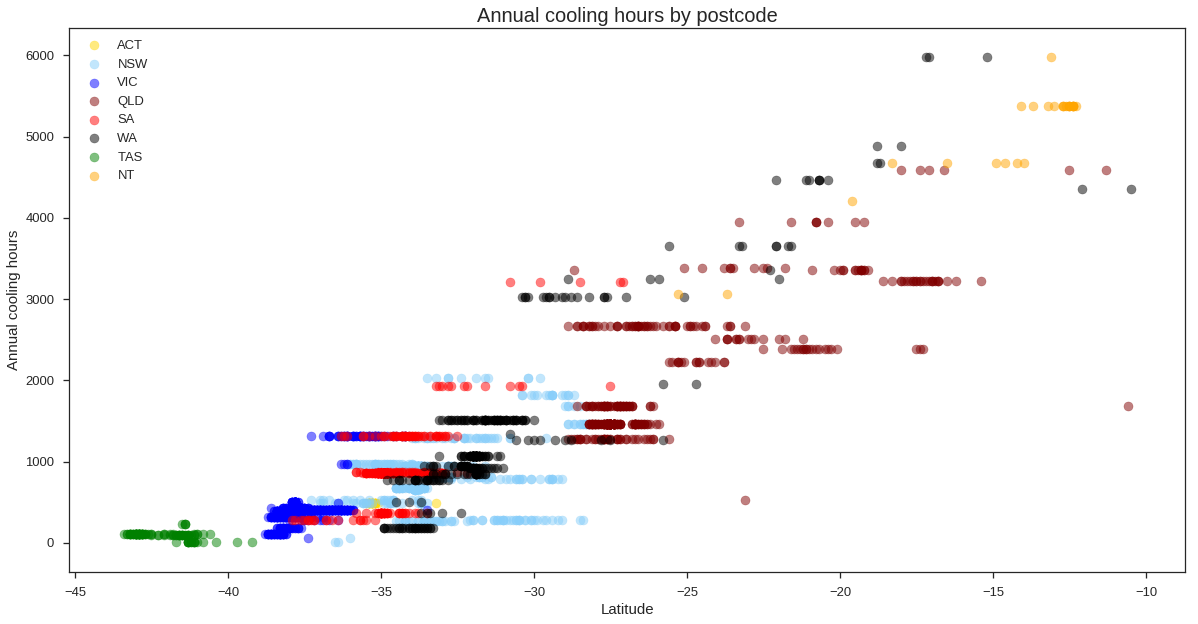

In [318]:

fig, ax = plt.subplots()
x = airdf["Latitude"]
y = airdf["Annual cooling hours"]

for state in states:
    ax.scatter(x[state_vector==state],y[state_vector==state],color=stateC[state],label = state,  alpha = 0.5)

ax.set_ylabel("Annual cooling hours", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Annual cooling hours by postcode', fontsize=20)

plt.legend(loc='upper left');

plt.show()

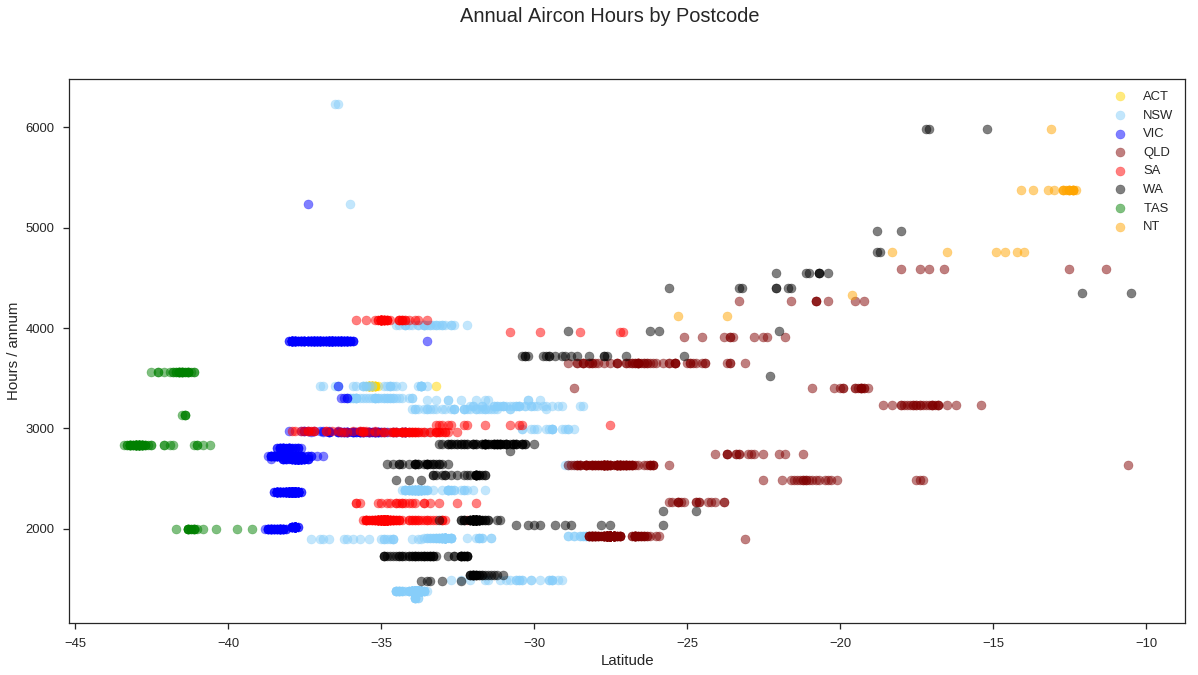

In [319]:

fig, ax = plt.subplots()
fig.suptitle("Annual Aircon Hours by Postcode", fontsize = 20)
x = airdf["Latitude"]
y = airdf["Annual heating hours"] + airdf["Annual cooling hours"]


for state in states:
    ax.scatter(x[state_vector==state],y[state_vector==state],color=stateC[state], label = state, alpha = 0.5)

ax.set_ylabel("Hours / annum", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)

plt.legend(loc='upper right');
plt.show()

## per state

In [320]:
# fig, ax = plt.subplots()
# x = airdf["Latitude"]
# y = airdf["Annual cooling hours"]

# for state in states:
#     ax.scatter(np.mean(x[state_vector==state]),np.mean(y[state_vector==state]),
#                label = state, color=stateC[state], s = 200, alpha = 0.7)
# plt.legend(loc='upper left');

# plt.show()

In [321]:

# fig, ax = plt.subplots()
# x = airdf["Latitude"]
# y = airdf["Annual heating hours"]

# for state in states:
#     ax.scatter(np.mean(x[state_vector==state]),np.mean(y[state_vector==state]),color=stateC[state],
#                label = state, s = 200, alpha = 0.7)
# plt.legend(loc='upper right');
# plt.show()

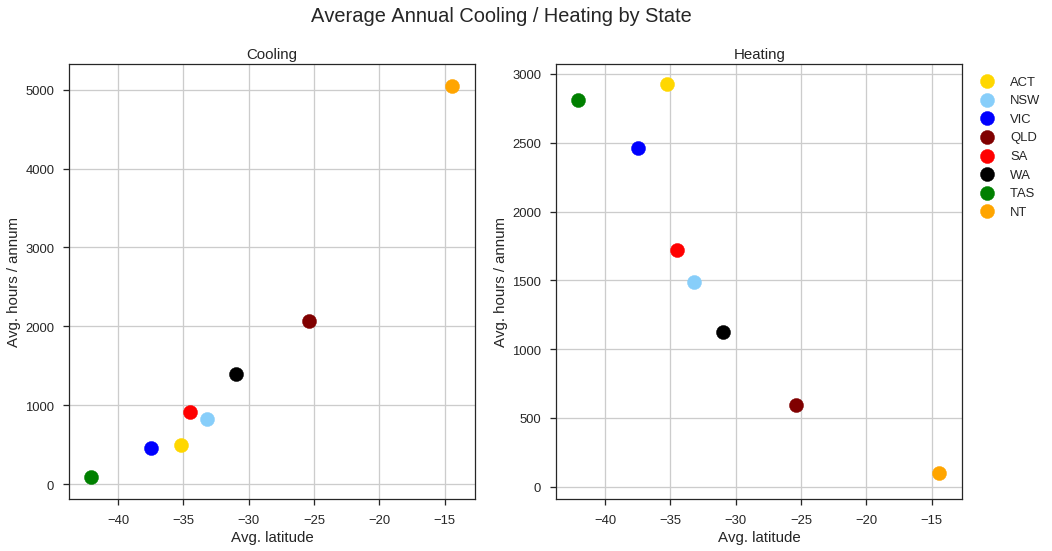

In [322]:
fig = plt.figure(figsize=plt.figaspect(0.5))
fig.suptitle("Average Annual Cooling / Heating by State", fontsize = 20)



ax = fig.add_subplot(1, 2, 1)

x = airdf["Latitude"]
yc = airdf["Annual cooling hours"]
yh = airdf["Annual heating hours"]

for state in states:
    ax.scatter(np.mean(x[state_vector==state]),np.mean(yc[state_vector==state]),color=stateC[state],
               label = state, s = 200)
    
ax.set_ylabel("Avg. hours / annum", fontsize=15)
ax.set_xlabel("Avg. latitude", fontsize=15)
ax.set_title("Cooling", fontsize=15)


ax.grid(True)
ax = fig.add_subplot(1, 2, 2)

for state in states:
       ax.scatter(np.mean(x[state_vector==state]),np.mean(yh[state_vector==state]),color=stateC[state],
               label = state, s = 200)
    
plt.legend(bbox_to_anchor = (1,1),loc=2, framealpha=1.0)

   
ax.set_ylabel("Avg. hours / annum", fontsize=15)
ax.set_xlabel("Avg. latitude", fontsize=15)
ax.set_title('Heating', fontsize=15)

ax.grid(True)    
plt.show()

In [323]:
# states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
# fig, ax = plt.subplots()
# x = airdf["Latitude"]
# y = airdf["Annual heating hours"] + airdf["Annual cooling hours"]
# stateC = {"ACT" : "gold", 
#               "NSW" : "lightskyblue", 
#               "VIC" : "blue", 
#               "QLD" : "maroon", 
#               "SA" : "r", 
#               "WA" : "k", 
#               "TAS" : "g", 
#               "NT" : "orange"}
# state_vector = airdf['State']
# #color = airdf['State colour']
# for state in states:
#     ax.scatter(np.mean(x[state_vector==state]),np.mean(y[state_vector==state]),color=stateC[state],
#                label = state, s = 200, alpha = 0.7)
# plt.legend(loc='upper left');
# plt.show()

In [324]:
# states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
# fig, ax = plt.subplots()
# x = airdf["Latitude"]
# y = airdf["Annual heating hours"] + airdf["Annual cooling hours"]
# stateC = {"ACT" : "gold", 
#               "NSW" : "lightskyblue", 
#               "VIC" : "blue", 
#               "QLD" : "maroon", 
#               "SA" : "r", 
#               "WA" : "k", 
#               "TAS" : "g", 
#               "NT" : "orange"}
# state_vector = airdf['State']
# #color = airdf['State colour']
# for state in states:
#     ax.scatter(np.median(x[state_vector==state]),np.median(y[state_vector==state]),color=stateC[state],
#                label = state, s = 200, alpha = 0.7)
# plt.legend(loc='upper left');
# plt.show()

In [325]:
# states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
# fig, ax = plt.subplots()
# x = airdf["Latitude"]
# y = airdf["Annual heating hours"] + airdf["Annual cooling hours"]
# stateC = {"ACT" : "gold", 
#               "NSW" : "lightskyblue", 
#               "VIC" : "blue", 
#               "QLD" : "maroon", 
#               "SA" : "r", 
#               "WA" : "k", 
#               "TAS" : "g", 
#               "NT" : "orange"}
# state_vector = airdf['State']
# #color = airdf['State colour']
# for state in states:
#     ax.scatter(np.mean(x[state_vector==state]),np.sum(y[state_vector==state]),color=stateC[state],
#                label = state, s = 200)
# plt.legend(loc='upper left');
# plt.show()

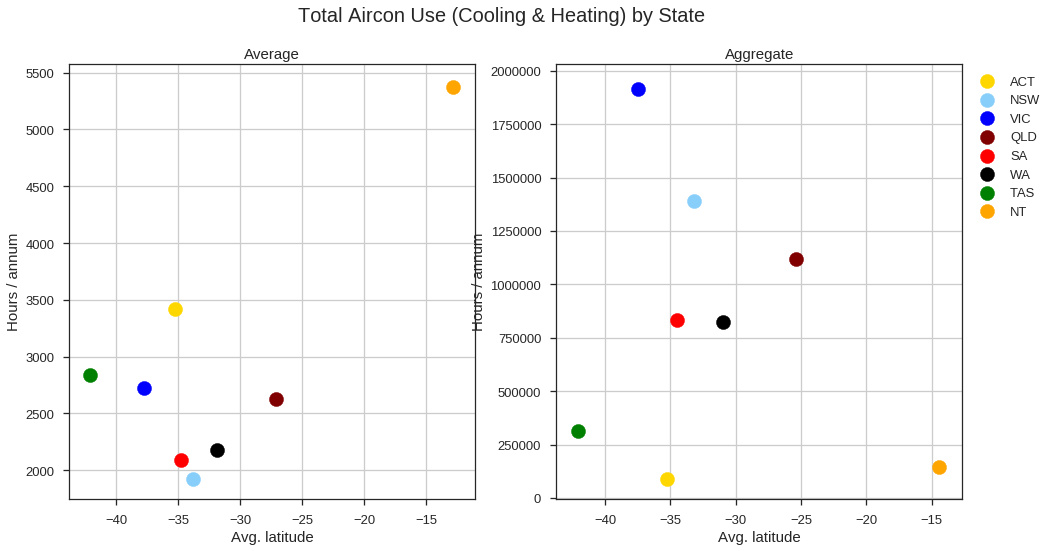

In [326]:
fig = plt.figure(figsize=plt.figaspect(0.5))
fig.suptitle("Total Aircon Use (Cooling & Heating) by State", fontsize = 20)


ax = fig.add_subplot(1, 2, 1)

x = airdf["Latitude"]
y = airdf["Annual heating hours"] + airdf["Annual cooling hours"]

for state in states:
    ax.scatter(np.median(x[state_vector==state]),np.median(y[state_vector==state]),color=stateC[state],
               label = state, s = 200)
    
ax.set_ylabel("Hours / annum", fontsize=15)
ax.set_xlabel("Avg. latitude", fontsize=15)
ax.set_title("Average", fontsize=15)

ax.grid(True)
ax = fig.add_subplot(1, 2, 2)

for state in states:
    ax.scatter(np.mean(x[state_vector==state]),np.sum(y[state_vector==state]),color=stateC[state],
               label = state, s = 200)
    
plt.legend(bbox_to_anchor = (1,1),loc=2, framealpha=1.0)

ax.set_ylabel("Hours / annum", fontsize=15)
ax.set_xlabel("Avg. latitude", fontsize=15)
ax.set_title('Aggregate', fontsize=15)

ax.grid(True)    
plt.show()

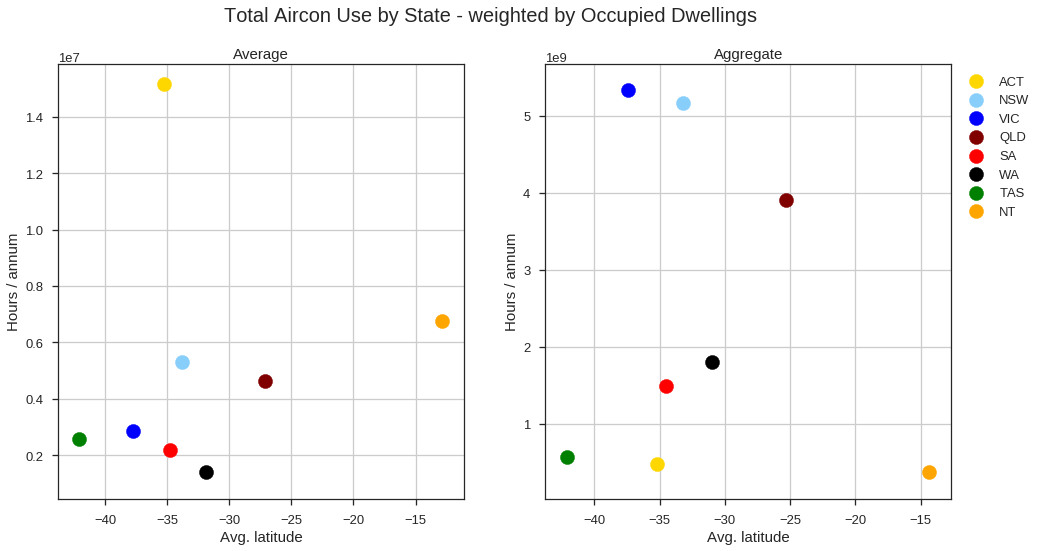

In [327]:
fig = plt.figure(figsize=plt.figaspect(0.5))
fig.suptitle("Total Aircon Use by State - weighted by Occupied Dwellings", fontsize = 20)

ax = fig.add_subplot(1, 2, 1)

x = airdf["Latitude"]
y = airdf["agHeating"] + airdf["agCooling"]

for state in states:
    ax.scatter(np.median(x[state_vector==state]),np.median(y[state_vector==state]),color=stateC[state],
               label = state, s = 200)
    
ax.set_ylabel("Hours / annum", fontsize=15)
ax.set_xlabel("Avg. latitude", fontsize=15)
ax.set_title("Average", fontsize=15)


ax.grid(True)
ax = fig.add_subplot(1, 2, 2)

for state in states:
    ax.scatter(np.mean(x[state_vector==state]),np.sum(y[state_vector==state]),color=stateC[state],
               label = state, s = 200)
    
plt.legend(bbox_to_anchor = (1,1),loc=2, framealpha=1.0)
   
ax.set_ylabel("Hours / annum", fontsize=15)
ax.set_xlabel("Avg. latitude", fontsize=15)
ax.set_title('Aggregate', fontsize=15)

ax.grid(True)    
plt.show()

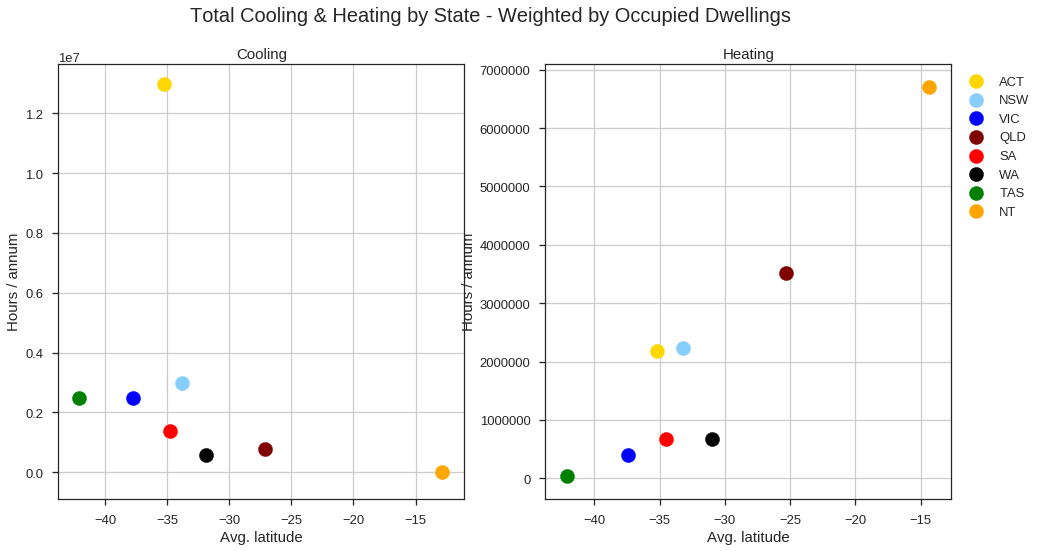

In [328]:
fig = plt.figure(figsize=plt.figaspect(0.5))
fig.suptitle("Total Cooling & Heating by State - Weighted by Occupied Dwellings", fontsize = 20)


ax = fig.add_subplot(1, 2, 1)

x = airdf["Latitude"]
yh =  airdf["agCooling"]
yc = airdf["agHeating"] 

for state in states:
    ax.scatter(np.median(x[state_vector==state]),np.median(yc[state_vector==state]),color=stateC[state],
               label = state, s = 200)
    
ax.set_ylabel("Hours / annum", fontsize=15)
ax.set_xlabel("Avg. latitude", fontsize=15)
ax.set_title("Cooling", fontsize=15)

# plt.legend(loc='upper left');
ax.grid(True)
ax = fig.add_subplot(1, 2, 2)

for state in states:
    ax.scatter(np.mean(x[state_vector==state]),np.median(yh[state_vector==state]),color=stateC[state],
               label = state, s = 200)
    
plt.legend(bbox_to_anchor = (1,1),loc=2, framealpha=1.0)
# leg=plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)

# for l in leg.get_lines():
#     l.set_alpha(1)
#     l.set_marker('.')
   
ax.set_ylabel("Hours / annum", fontsize=15)
ax.set_xlabel("Avg. latitude", fontsize=15)
ax.set_title('Heating', fontsize=15)

ax.grid(True)    
plt.show()

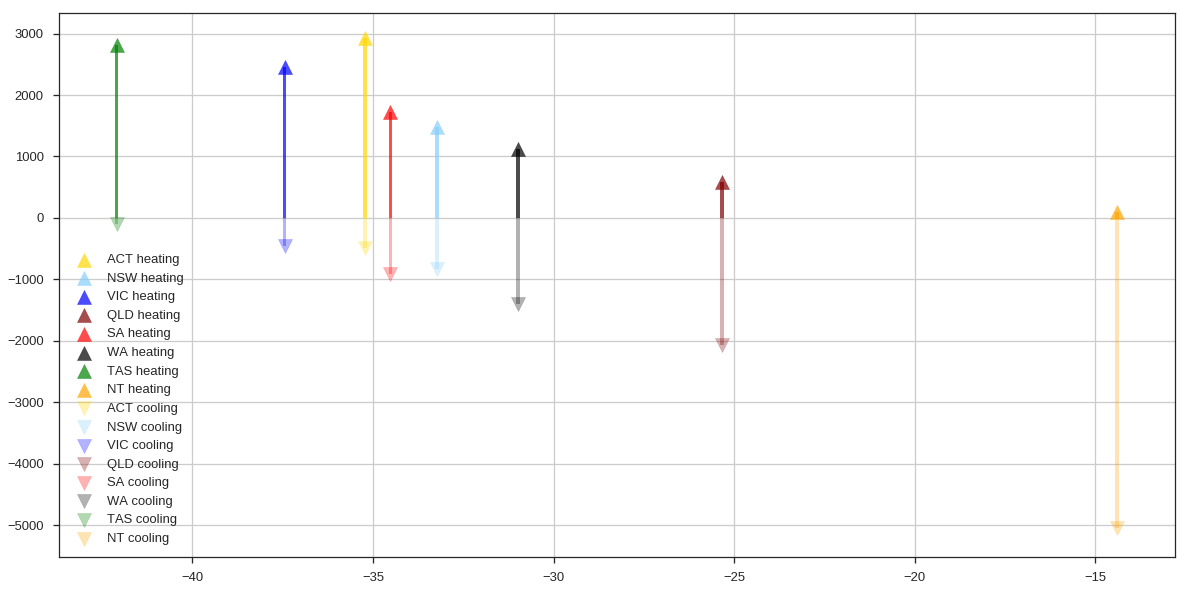

In [329]:

fig, ax = plt.subplots()
x = airdf["Latitude"]
yc = airdf["Annual cooling hours"]
yh = airdf["Annual heating hours"]

for state in states:
    ax.scatter(np.mean(x[state_vector==state]),np.mean(yh[state_vector==state]),color=stateC[state], 
               label = state + " heating", marker ="^",  s = 200, alpha = 0.7)
    ax.bar(np.mean(x[state_vector==state]),np.mean(yh[state_vector==state]),
               color=stateC[state], width = 0.1, alpha = 0.7)
for state in states:
    ax.scatter(np.mean(x[state_vector==state]),np.mean(yc[state_vector==state])*-1,color=stateC[state], 
               label = state + " cooling", marker = "v",   s = 200, alpha = 0.3)
    ax.bar(np.mean(x[state_vector==state]),np.mean(-yc[state_vector==state]),
               color=stateC[state], width = 0.1, alpha = 0.3)
plt.legend(loc='lower left');
ax.grid(True)
plt.show()

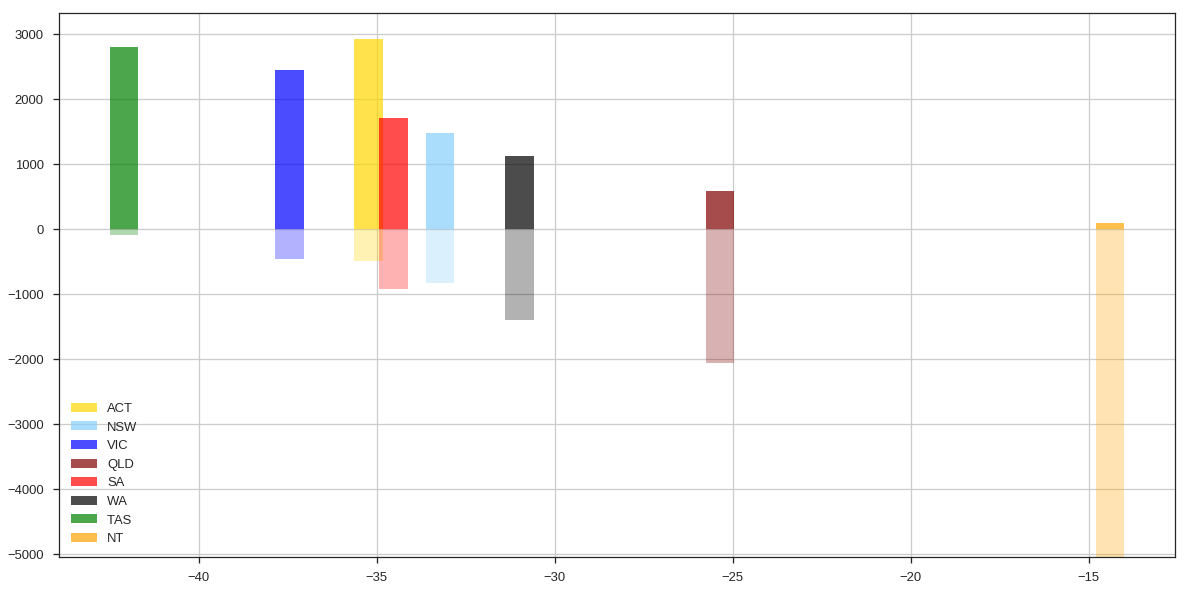

In [330]:

fig, ax = plt.subplots()
x = airdf["Latitude"]
yc = airdf["Annual cooling hours"]
yh = airdf["Annual heating hours"]

for state in states:
    ax.bar(np.mean(x[state_vector==state]),np.mean(yh[state_vector==state]),
               label = state, color=stateC[state], alpha = 0.7)
for state in states:
    ax.bar(np.mean(x[state_vector==state]),np.mean(-yc[state_vector==state]),
                color=stateC[state], alpha = 0.3)
plt.legend(loc='lower left');

ax.grid(True)
plt.show()

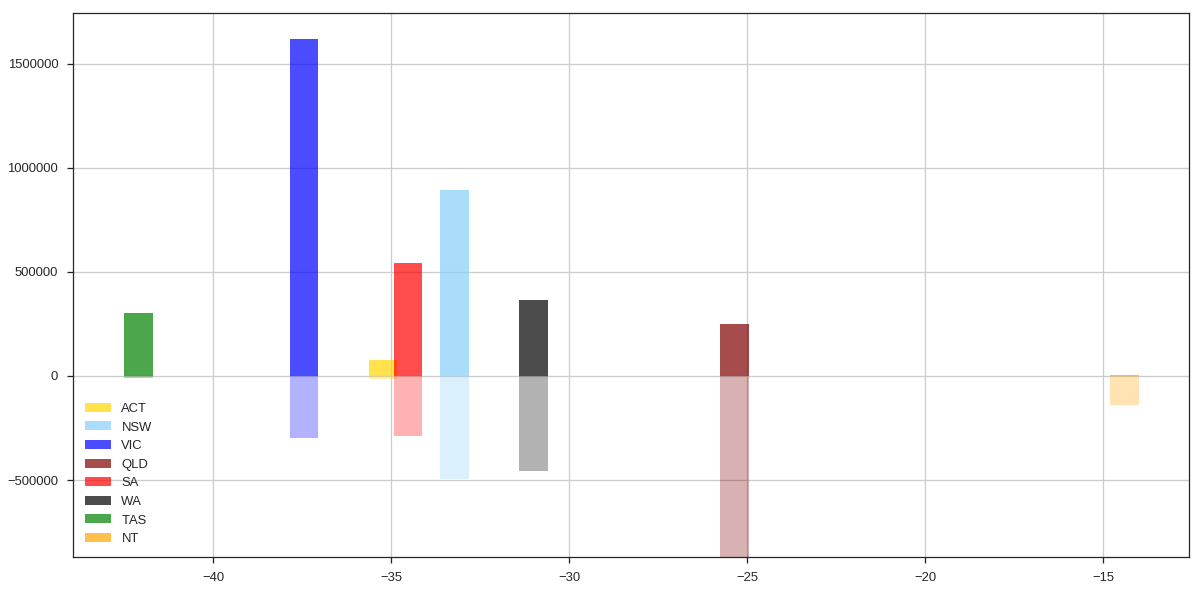

In [331]:

fig, ax = plt.subplots()
x = airdf["Latitude"]
yc = airdf["Annual cooling hours"]
yh = airdf["Annual heating hours"]

for state in states:
    ax.bar(np.mean(x[state_vector==state]),np.sum(yh[state_vector==state]),
               label = state, color=stateC[state], alpha = 0.7)
for state in states:
    ax.bar(np.mean(x[state_vector==state]),np.sum(-yc[state_vector==state]),
                color=stateC[state], alpha = 0.3)
# plt.plot(np.mean(x[state_vector==state]),np.mean(y[state_vector==state]))
plt.legend(loc='lower left');

ax.grid(True)
plt.show()

# Mapping


## Scatter Lat /Lon


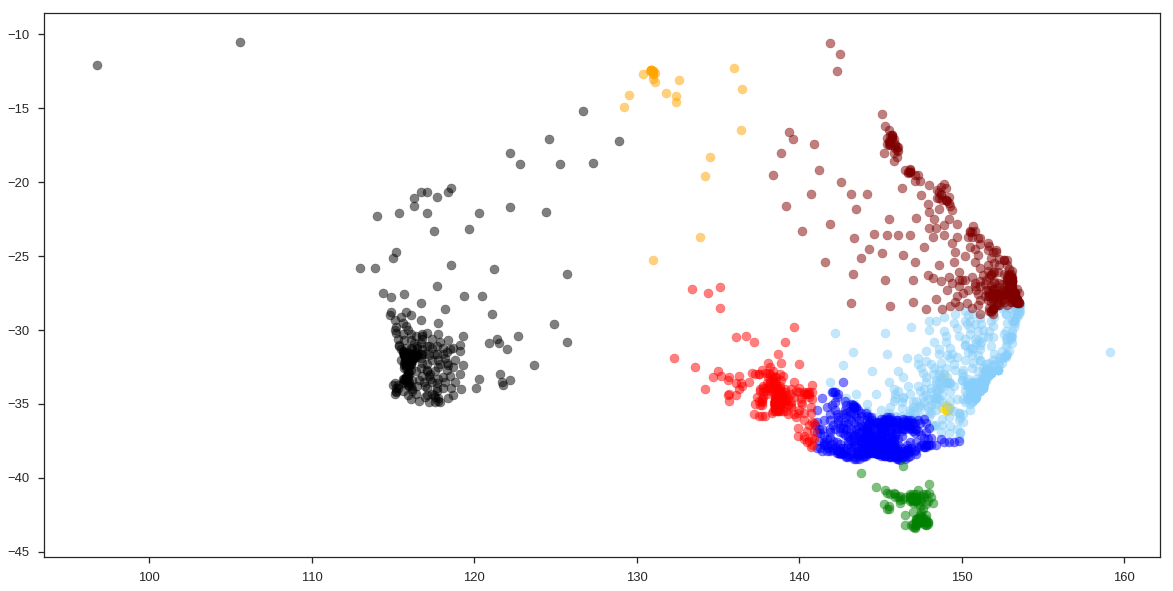

In [332]:

fig, ax = plt.subplots()
x = airdf["Longitude"]
y = airdf["Latitude"]

for state in states:
    ax.scatter(x[state_vector==state],y[state_vector==state],color=stateC[state], alpha = 0.5)


plt.show()

continent                                               Oceania
gdp_md_est                                               800200
geometry      (POLYGON ((145.3979781434948 -40.7925485166058...
iso_a3                                                      AUS
name                                                  Australia
pop_est                                             2.12626e+07
Name: 8, dtype: object


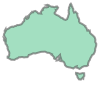

In [333]:
aus = gp.read_file(gp.datasets.get_path('naturalearth_lowres')).iloc[8]
print aus
aus.geometry


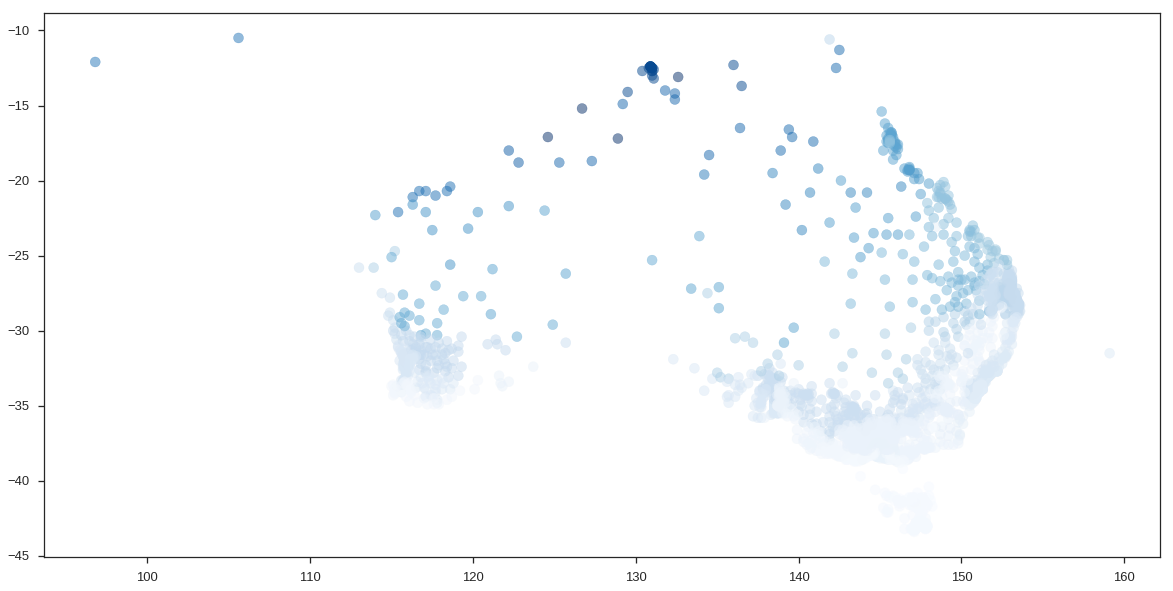

In [334]:
fig, ax = plt.subplots()
x = airdf["Longitude"]
y = airdf["Latitude"]
z = airdf["Annual cooling hours"]
c = z
ax.scatter(x,y, c=c, cmap="Blues", s = 100, alpha = 0.5)
plt.show()

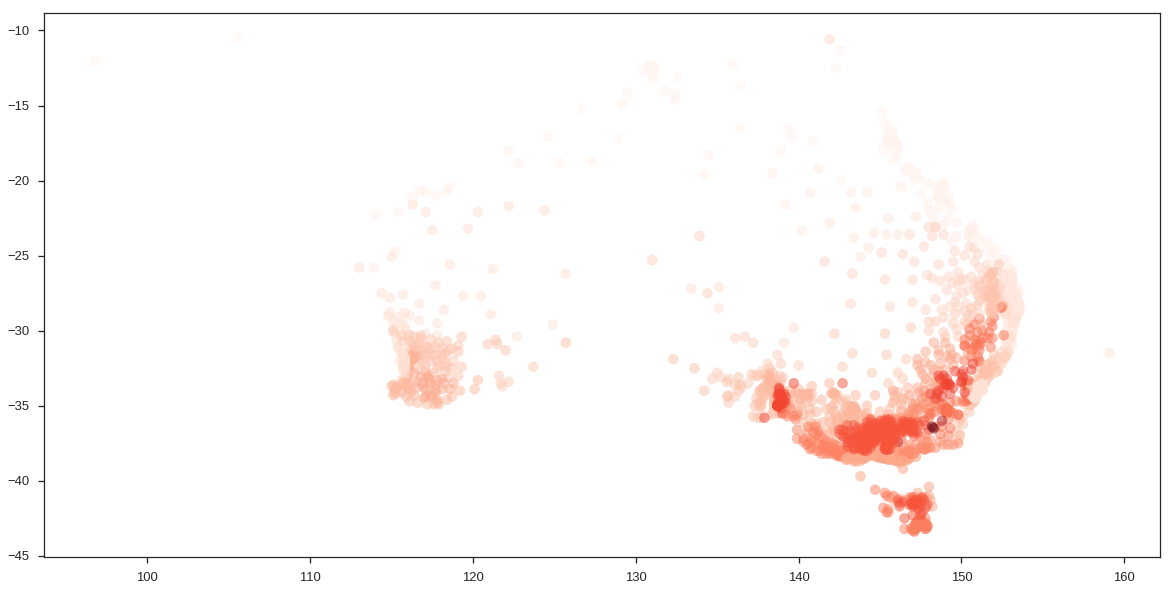

In [335]:
fig, ax = plt.subplots()
x = airdf["Longitude"]
y = airdf["Latitude"]
z = airdf["Annual heating hours"]
c = z
ax.scatter(x,y, c=c, cmap="Reds", s = 100, alpha = 0.5)
plt.show()

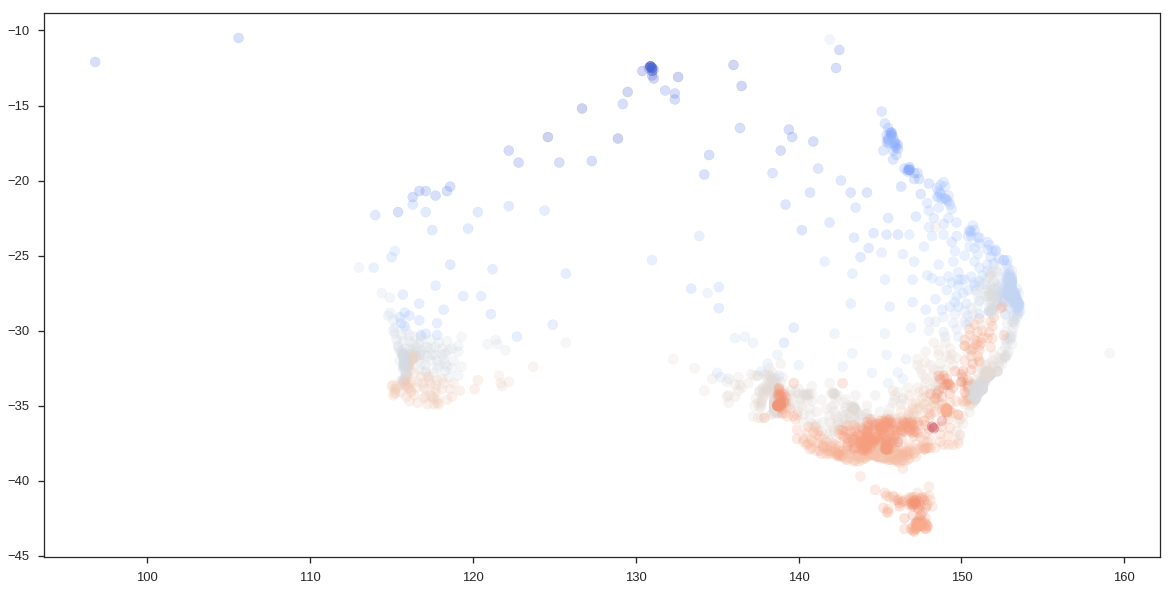

In [336]:
fig, ax = plt.subplots()
x = airdf["Longitude"]
y = airdf["Latitude"]
z = airdf["Annual heating hours"]- airdf["Annual cooling hours"]
# c = np.abs(z)
c = z
ax.scatter(x,y, c=z, cmap="coolwarm", s = 100, alpha = 0.25)
plt.show()

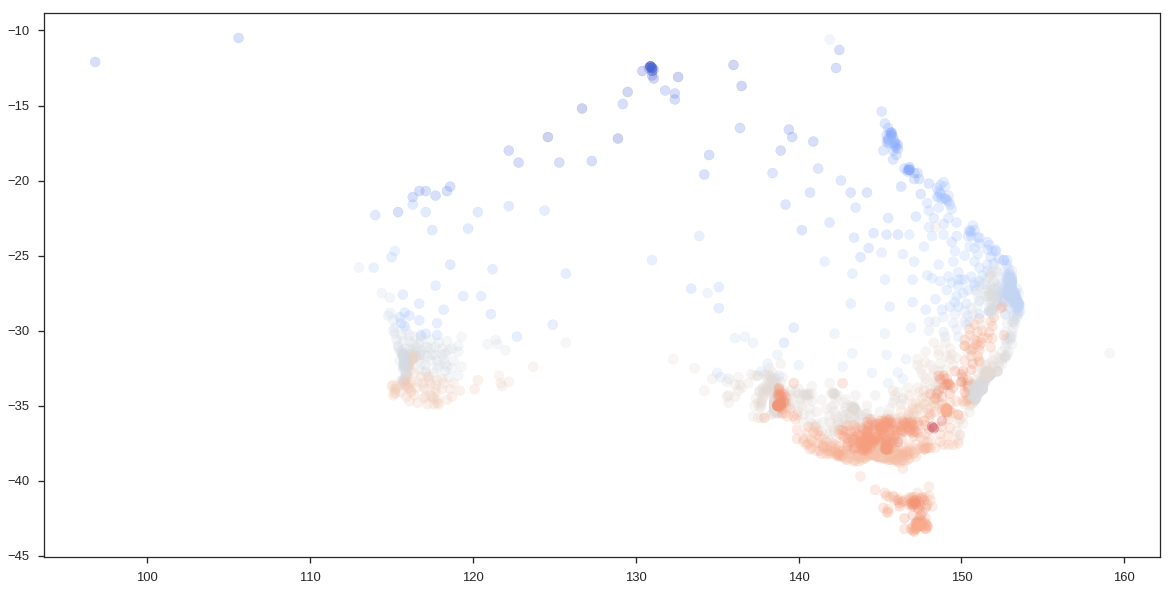

In [337]:
fig, ax = plt.subplots()
x = airdf["Longitude"]
y = airdf["Latitude"]
z = airdf["Annual heating hours"]- airdf["Annual cooling hours"]
# c = np.abs(z)
c = z
ax.scatter(x,y, c=z, cmap="coolwarm", s = 100, alpha = 0.25)
aus.plot
plt.show()

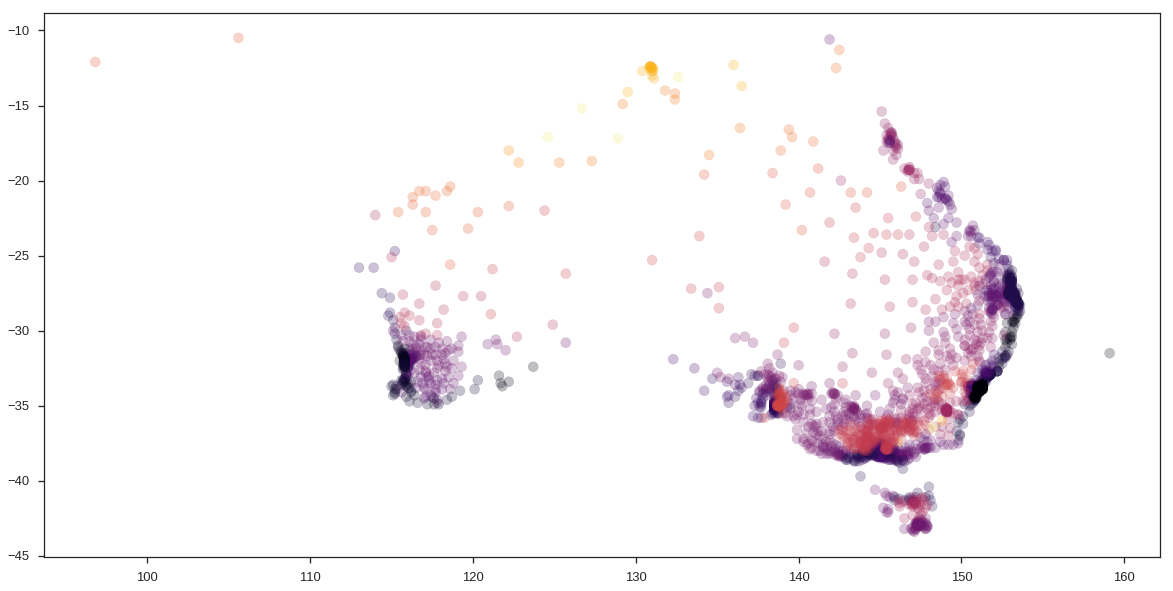

In [338]:
fig, ax = plt.subplots()
x = airdf["Longitude"]
y = airdf["Latitude"]
z = airdf["Annual cooling hours"] + airdf["Annual heating hours"]
c = np.abs(z)
ax.scatter(x,y, c=z, cmap="inferno", s = 100, alpha = 0.25)
plt.show()

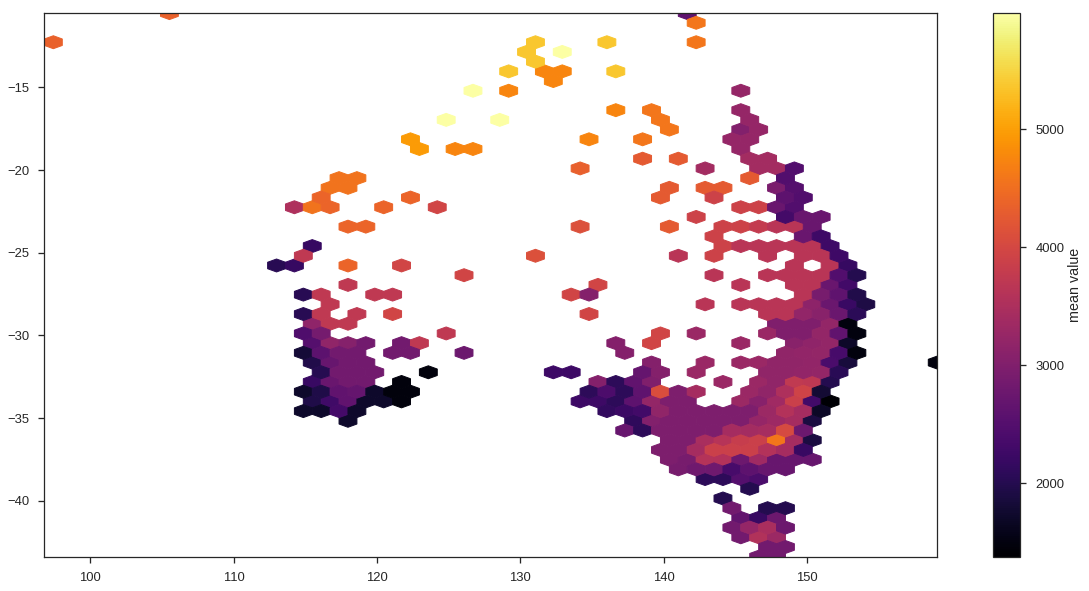

In [339]:

n = 1e5
x = y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 2, 2, 0, 0)
Z2 = mlab.bivariate_normal(X, Y, 4, 1, 1, 1)
ZD = Z2 - Z1
x = airdf["Longitude"]
y = airdf["Latitude"]
z = airdf["Annual cooling hours"] + airdf["Annual heating hours"]
gridsize=50
plt.subplot(111)

# if 'bins=None', then color of each hexagon corresponds directly to its count
# 'C' is optional--it maps values to x-y coordinates; if 'C' is None (default) then 
# the result is a pure 2D histogram 

plt.hexbin(x, y, C=z, gridsize=gridsize, cmap="inferno", bins=None)
plt.axis([x.min(), x.max(), y.min(), y.max()])

cb = plt.colorbar()
cb.set_label('mean value')
plt.show()   

## POA shapefile

Choropleths. Most have been #-ed out for speed.

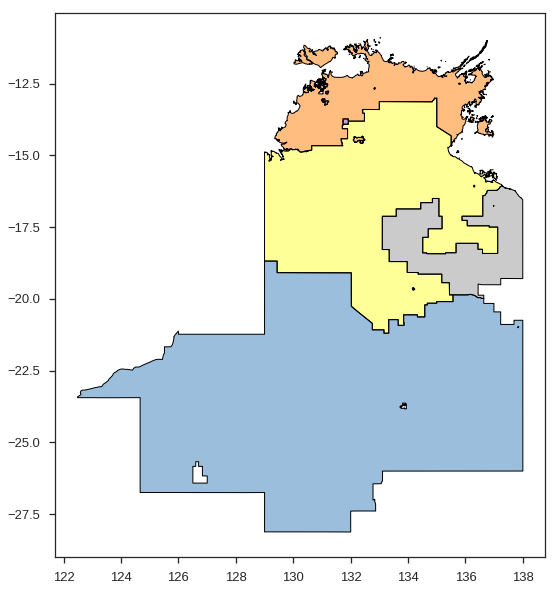

In [340]:
gp_adf_NT.geometry.plot()

In [341]:
# ch = dict(column='Annual cooling hours', linewidth=0, colormap='spring')
# gp_adf_NT.plot(**ch)

In [342]:
# sc = dict(  linewidth=0, facecolor= gp_airdf["State colour"])
# # sc = dict( column='Postcode', linewidth=0, facecolor= gp_airdf["State colour"])
# gp_airdf[gp_airdf.State == "SA"].plot(**sc)
# # gp_airdf.geometry(**sc)

In [343]:
# ch = dict(column='Annual heating hours', linewidth=0, colormap='hot')
# gp_airdf[gp_airdf.State == "WA"].plot(**ch)

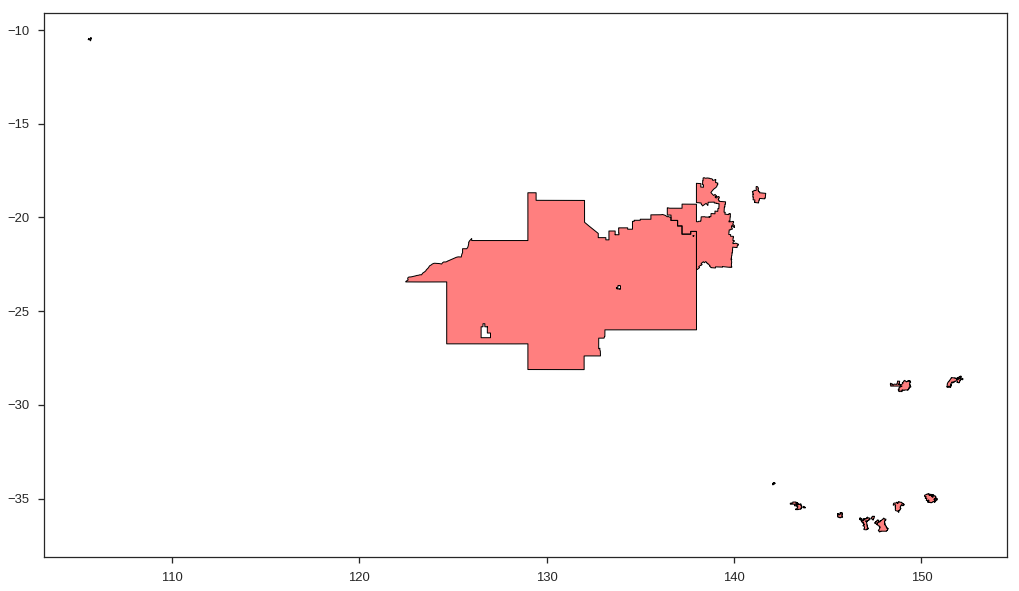

In [344]:


gp_airdf[ gp_airdf["Postcode"].isin(interpoa) ].plot(color="red")

In [345]:
# ch = dict(column='Occupied private dwellings', linewidth=0, colormap='rainbow')
# gp_airdf[gp_airdf.State == "WA"].plot(**ch)

In [346]:
# ch = dict(column='Occupied private dwellings' , linewidth=1, colormap='inferno')
# gp_airdf[gp_airdf.State == "ACT"].plot(**ch)

In [347]:
# ch = dict(column='Annual cooling hours', linewidth=0, colormap='Blues')
# gp_adf_NSW.plot(**ch)

In [348]:
# ch = dict(column='Annual heating hours', linewidth=0, colormap='Reds')
# gp_adf_NSW.plot(**ch)

/usr/local/lib/python2.7/dist-packages/geopandas/plotting.py:225: FutureWarning:

'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)



KeyboardInterrupt: 

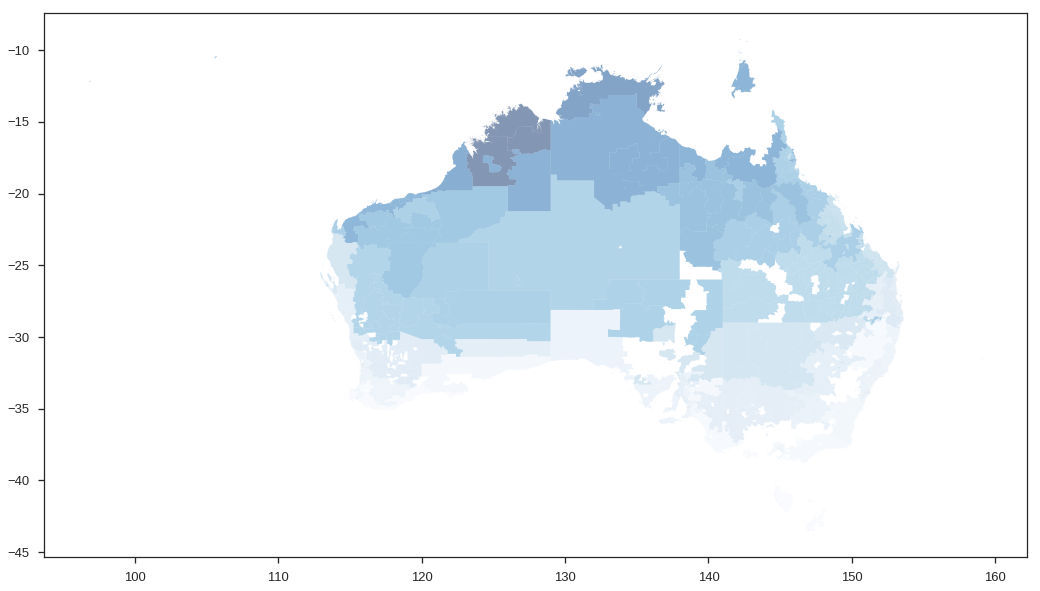

In [349]:
# ch = dict(column='Annual cooling hours', linewidth=0, colormap='Blues')
# gp_airdf.plot(**ch)

In [350]:
# ch = dict(column='Annual heating hours', linewidth=0, colormap='Reds')
# gp_airdf.plot(**ch)

In [351]:
# shapely.geometry.plot(airdf)

In [352]:
# print type(airdf["geometry"].iloc[1])
# airdf["geometry"].iloc[1].plot()

In [353]:
# airdf.iloc[1].plot()

In [354]:
# shapely.plot(airdf["geometry"].iloc[1])

## Basemap

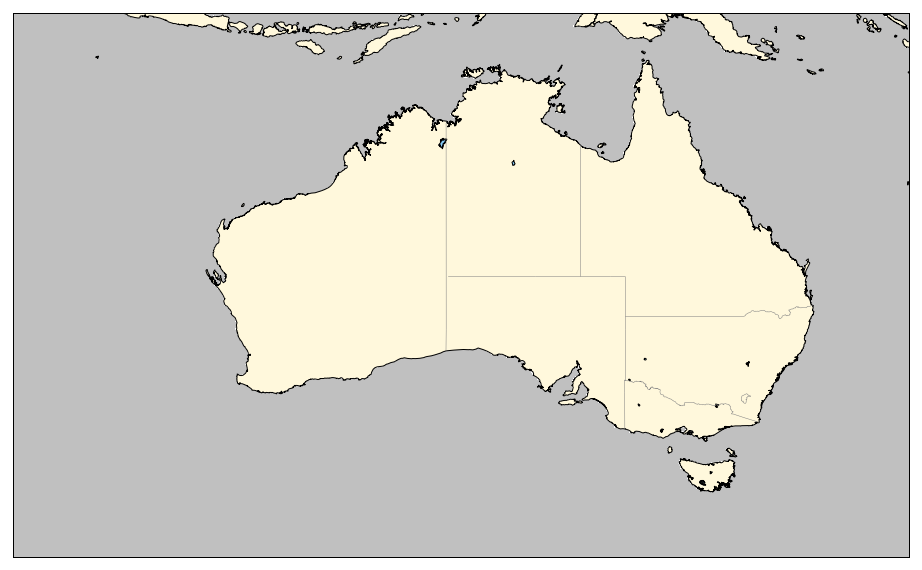

In [355]:
latmin = -44+1    
latmax = -9+1.5   
lonmin = 100 
lonmax = 160  
latmid = -25.6
lonmid = 130

m = Basemap(llcrnrlon=lonmin, llcrnrlat=-50, 
    urcrnrlon=lonmax, urcrnrlat=latmax, resolution='i',
    lat_0=latmid, lon_0=lonmid, 
    area_thresh=100.,projection='cea')

water = 'lightskyblue'
earth = 'cornsilk'
continents = m.fillcontinents(
    color=earth,
    lake_color=water)
bound= m.drawmapboundary(fill_color=water)
# m.shadedrelief()
# m.etopo()
# m.bluemarble()

m.drawlsmask(land_color='white',ocean_color='silver',lakes=True)


coast = m.drawcoastlines()
m.drawstates(color='0.5')


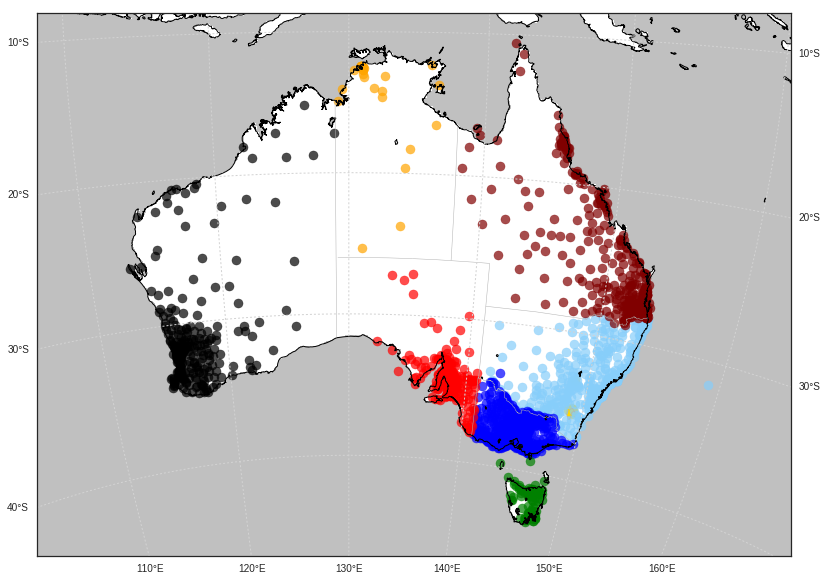

In [356]:

m = Basemap(llcrnrlon=lonmin, llcrnrlat=latmin, 
    urcrnrlon=lonmax, urcrnrlat=latmax, resolution='i',
    lat_0=latmid, lon_0=lonmid, 
    area_thresh=100.,projection='tmerc')


x = airdf["Longitude"]
y = airdf["Latitude"]

m.drawlsmask(land_color='white',ocean_color='silver',lakes=True)

for state in states:
    sx = x[state_vector==state]
    sy = y[state_vector==state]
    sx = sx.tolist()
    sy = sy.tolist()
    mx, my = m(sx, sy)
    m.scatter(mx,my,color=stateC[state], alpha = 0.7)

coast = m.drawcoastlines()
m.drawstates(color='0.7')
merid = m.drawmeridians(
    np.arange(-180, 180, 10), color="lightgrey",
    labels=[False, False, False, True])
parall = m.drawparallels(
    np.arange(-50, 0, 10), labels=[True, True, False, False], color="lightgrey")



## Shapefile / Projection working
Here be headaches

In [357]:
# ##Shapefile / projection workin

# m = Basemap(llcrnrlon=lonmin, llcrnrlat=latmin, 
#     urcrnrlon=lonmax, urcrnrlat=latmax, resolution='i',
#     lat_0=latmid, lon_0=lonmid, 
#     area_thresh=100.,projection='tmerc')
    
# # m.shadedrelief()
# # m.etopo()
# # m.bluemarble()

# m.drawlsmask(land_color='white',ocean_color='silver',lakes=True)


# coast = m.drawcoastlines()
# m.drawstates(color='0.7')
# merid = m.drawmeridians(
#     np.arange(-180, 180, 10), color="lightgrey",
#     labels=[False, False, False, True])
# parall = m.drawparallels(
#     np.arange(-50, 0, 10), labels=[True, True, False, False], color="lightgrey")

# # poaShapes = poa_shp_file_name
# # poaShapes = "POA_2016_AUST"

# # m.readshapefile(poaShapes, 'comarques', drawbounds = True)



# patches = []
# # selection = gp_airdf[gp_airdf.State == "NT"]
# selection = gp_adf_NT
# for poly in selection.geometry:
#     if poly.geom_type == 'Polygon':
#         mpoly = shapely.ops.transform(m, poly)
#         patches.append(PolygonPatch(mpoly))
#     elif poly.geom_type == 'MultiPolygon':
#         for subpoly in poly:
#             mpoly = shapely.ops.transform(m, poly)
#             patches.append(PolygonPatch(mpoly))

            
# # ax1 = gp_adf_NT.plot()
# # # ax1.set_aspect(2)
# # poaproject = ax1.add_collection(
# #     PatchCollection(patches, match_original=True))
    
# m.plot(PatchCollection(patches, match_original=True))

# # for info, shape in zip(map.comarques_info, map.comarques):
# #     if info['nombre'] == 'Selva':
# #         x, y = zip(*shape) 
# #         map.plot(x, y, marker=None,color='m')

In [358]:

# m = Basemap(llcrnrlon=lonmin, llcrnrlat=latmin, 
#     urcrnrlon=lonmax, urcrnrlat=latmax, resolution='i',
#     lat_0=latmid, lon_0=lonmid, 
#     area_thresh=100.,projection='tmerc')
    
# # m.shadedrelief()
# # m.etopo()
# # m.bluemarble()

# m.drawlsmask(land_color='white',ocean_color='silver',lakes=True)


# coast = m.drawcoastlines()
# m.drawstates(color='0.7')
# merid = m.drawmeridians(
#     np.arange(-180, 180, 10), color="lightgrey",
#     labels=[False, False, False, True])
# parall = m.drawparallels(
#     np.arange(-50, 0, 10), labels=[True, True, False, False], color="lightgrey")

# # poaShapes = poa_shp_file_name
# # poaShapes = "POA_2016_AUST"

# # m.readshapefile(poaShapes, 'comarques', drawbounds = True)



# # patches = []
# # # selection = gp_airdf[gp_airdf.State == "NT"]
# # selection = gp_adf_NT
# # for poly in selection.geometry:
# #     if poly.geom_type == 'Polygon':
# #         mpoly = shapely.ops.transform(m, poly)
# #         patches.append(PolygonPatch(mpoly))
# #     elif poly.geom_type == 'MultiPolygon':
# #         for subpoly in poly:
# #             mpoly = shapely.ops.transform(m, poly)
# #             patches.append(PolygonPatch(mpoly))

            
# # ax1 = gp_adf_NT.plot()
# # # ax1.set_aspect(2)
# # poaproject = ax1.add_collection(
# #     PatchCollection(patches, match_original=True))
    
# ax.add_collection(matplotlib.collections.PatchCollection(mpatches, match_original=True))
# ax.plot()

# plt.show()
            

# # for info, shape in zip(map.comarques_info, map.comarques):
# #     if info['nombre'] == 'Selva':
# #         x, y = zip(*shape) 
# #         map.plot(x, y, marker=None,color='m')

In [359]:

# fig, ax = plt.subplots()

# m = Basemap(llcrnrlon=lonmin, llcrnrlat=latmin, 
#     urcrnrlon=lonmax, urcrnrlat=latmax, resolution='i',
#     lat_0=latmid, lon_0=lonmid, 
#     area_thresh=100.,projection='tmerc')
    
# # m.shadedrelief()
# # m.etopo()
# # m.bluemarble()

# m.drawlsmask(land_color='white',ocean_color='silver',lakes=True)


# coast = m.drawcoastlines()
# m.drawstates(color='0.7')
# merid = m.drawmeridians(
#     np.arange(-180, 180, 10), color="lightgrey",
#     labels=[False, False, False, True])
# parall = m.drawparallels(
#     np.arange(-50, 0, 10), labels=[True, True, False, False], color="lightgrey")

# # poaShapes = poa_shp_file_name
# # poaShapes = "POA_2016_AUST"

# # m.readshapefile(poaShapes, 'comarques', drawbounds = True)

# codes = gp.read_file('POA_2016_AUST.shp')

# patches = []

# #add polygons
# for poly in codes.geometry:
#     #deal with single polygons and multipolygons
#     if poly.geom_type == 'Polygon':
#         p = PolygonPatch(poly, facecolor='blue', alpha=1)
#         #plt.gca().add_patch(p)
#         #ax.add_patch(p)
#         patches.append(p)

#     elif poly.geom_type == 'MultiPolygon':
#         for single in poly:
#             q = PolygonPatch(single,facecolor='red', alpha=1)
#             #ax.add_patch(p)
#             patches.append(q)
#     else:
#         nothing

# # patches = []
# # # selection = gp_airdf[gp_airdf.State == "NT"]
# # selection = gp_adf_NT
# # for poly in selection.geometry:
# #     if poly.geom_type == 'Polygon':
# #         mpoly = shapely.ops.transform(m, poly)
# #         patches.append(PolygonPatch(mpoly))
# #     elif poly.geom_type == 'MultiPolygon':
# #         for subpoly in poly:
# #             mpoly = shapely.ops.transform(m, poly)
# #             patches.append(PolygonPatch(mpoly))

# # ch = dict(column='Annual cooling hours', linewidth=0, colormap='Blues')
# # w = gp_adf_NSW.plot(**ch)

# # p = PatchCollection(patches, match_original=True, cmap="spring")
# # m.plot(p)
# # ax.add_collection(w)


# # ch = dict(column='Annual heating hours', linewidth=0, colormap='hot')
# # patches.plot(colormap='hot')

# ax.add_collection(matplotlib.collections.PatchCollection(patches, match_original=True))
# ax.plot()

# plt.show()
            
# # ax1 = gp_adf_NT.plot()
# # # ax1.set_aspect(2)
# # poaproject = ax1.add_collection(
# #     PatchCollection(patches, match_original=True))
    
# # m.plot(PatchCollection(patches, match_original=True))

# # for info, shape in zip(map.comarques_info, map.comarques):
# #     if info['nombre'] == 'Selva':
# #         x, y = zip(*shape) 
# #         map.plot(x, y, marker=None,color='m')

In [360]:
# fig, ax = plt.subplots()

# m = Basemap(llcrnrlon=lonmin, llcrnrlat=latmin, 
#     urcrnrlon=lonmax, urcrnrlat=latmax, resolution='i',
#     lat_0=latmid, lon_0=lonmid, 
#     area_thresh=100.,projection='tmerc')
    
# m.drawlsmask(land_color='white',ocean_color='silver',lakes=True)
# m.drawcoastlines()
# m.drawstates(color='0.7')
# merid = m.drawmeridians(
#     np.arange(-180, 180, 10), color="lightgrey",
#     labels=[False, False, False, True])
# parall = m.drawparallels(
#     np.arange(-50, 0, 10), labels=[True, True, False, False], color="lightgrey")

# # poaShapes = poa_shp_file_name
# # poaShapes = "POA_2016_AUST"

# # m.readshapefile(poaShapes, 'comarques', drawbounds = True)



# # patches = []
# # # selection = gp_airdf[gp_airdf.State == "NT"]
# # selection = gp_adf_NT
# # for poly in selection.geometry:
# #     if poly.geom_type == 'Polygon':
# #         mpoly = shapely.ops.transform(m, poly)
# #         patches.append(PolygonPatch(mpoly))
# #     elif poly.geom_type == 'MultiPolygon':
# #         for subpoly in poly:
# #             mpoly = shapely.ops.transform(m, poly)
# #             patches.append(PolygonPatch(mpoly))

            
# # ax1 = gp_adf_NT.plot()
# # # ax1.set_aspect(2)
# # poaproject = ax1.add_collection(
# #     PatchCollection(patches, match_original=True))
    
# # p = PatchCollection(patches, match_original=True, cmap="spring")
# # # m.plot(p)
# # ax.add_collection(p)

# # ax.add_collection(patches)
# # ch = dict(column='Annual heating hours', linewidth=0, colormap='hot')
# # patches.plot(colormap='hot')

# # plt.show()
# # for info, shape in zip(map.comarques_info, map.comarques):
# #     if info['nombre'] == 'Selva':
# #         x, y = zip(*shape) 
# #         map.plot(x, y, marker=None,color='m')

In [361]:


# shapefilename = gp.read_file('POA_2016_AUST.shp')
# shp = fiona.open(shapefilename)
# coords = shp.bounds
# shp.close()



In [362]:
# gp_adf_NT
# shapefilename
# Mgp_adf_NT = gp_adf_NT

In [363]:
# def convert_3D_2D(geometry):
#     '''
#     Takes a GeoSeries of Multi/Polygons and returns a list of Multi/Polygons
#     '''
#     import geopandas as gp
#     new_geo = []
#     for p in geometry:
#         if p.has_z:
#             if p.geom_type == 'Polygon':
#                 lines = [xy[:2] for xy in list(p.exterior.coords)]
#                 new_p = Polygon(lines)
#                 new_geo.append(new_p)
#             elif p.geom_type == 'MultiPolygon':
#                 new_multi_p = []
#                 for ap in p:
#                     lines = [xy[:2] for xy in list(ap.exterior.coords)]
#                     new_p = Polygon(lines)
#                     new_multi_p.append(new_p)
#                 new_geo.append(MultiPolygon(new_multi_p))
#     return new_geo




In [364]:
# Mgp_adf_NT.geometry = convert_3D_2D(gp_adf_NT.geometry)

In [365]:
## This might take a VERRY long time to run

# patches = []

# #add polygons
# for poly in gp_airdf.geometry:
#     #deal with single polygons and multipolygons
#     if poly.geom_type == 'Polygon':
#         p = PolygonPatch(poly, facecolor='blue', alpha=1)
#         #plt.gca().add_patch(p)
#         #ax.add_patch(p)
#         patches.append(p)

#     elif poly.geom_type == 'MultiPolygon':
#         for single in poly:
#             q = PolygonPatch(single,facecolor='red', alpha=1)
#             #ax.add_patch(p)
#             patches.append(q)

In [366]:

# mgp_airdf = gp_airdf

# patches = []

# for poly in mgp_airdf.geometry:
#     if poly.geom_type == 'Polygon':
#         mpoly = shapely.ops.transform(m, poly)
#         patches.append(PolygonPatch(mpoly))
#     elif poly.geom_type == 'MultiPolygon':
#         for subpoly in poly:
#             mpoly = shapely.ops.transform(m, poly)
#             patches.append(PolygonPatch(mpoly))
#     else:
#         print x
            
# mgp_airdf["Mgeometry"] = patches
# mgp_airdf["Mgeometry"]

In [367]:
# mpatches = patches

## geopandas

In [368]:
# world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
# bounds = gp_airdf.geometry.bounds

# ax.set_ylim([bounds.miny.min()-5, bounds.maxy.max()+5])
# ax.set_xlim([bounds.minx.min()-5, bounds.maxx.max()+5]);
# world.plot(color='none')


# plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
# plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5]);

# x = gp_airdf["Longitude"]
# y = gp_airdf["Latitude"]
# z = gp_airdf["Annual heating hours"]
# c = z
# ax.scatter(x,y, c=c, cmap="Reds", s = 100, alpha = 0.5)

# plt.show()

# Machine learning


In [369]:
# #cluster data set
cluster_df = pd.DataFrame()
cluster_df["Longitude"] = airdf["Longitude"]
cluster_df["Latitude"] = airdf["Latitude"]
cluster_df.head()
lon = list(cluster_df["Longitude"])
lat = list(cluster_df["Latitude"])

pairs = zip(lon, lat)
skPairs = [list(p) for p in pairs] 

skPairs


[[130.80000000000001, -12.5],
 [130.90000000000001, -12.4],
 [130.90000000000001, -12.4],
 [130.90000000000001, -12.4],
 [129.5, -14.1],
 [130.90000000000001, -12.4],
 [130.90000000000001, -12.4],
 [131.0, -12.5],
 [131.0, -12.5],
 [131.0, -12.5],
 [131.09999999999999, -12.6],
 [131.0, -12.699999999999999],
 [131.0, -12.699999999999999],
 [130.40000000000001, -12.699999999999999],
 [131.0, -13.0],
 [131.09999999999999, -13.199999999999999],
 [136.0, -12.300000000000001],
 [136.5, -13.699999999999999],
 [115.40000000000001, -22.100000000000001],
 [116.7, -20.699999999999999],
 [116.3, -21.100000000000001],
 [117.7, -21.0],
 [117.09999999999999, -20.699999999999999],
 [118.40000000000001, -20.699999999999999],
 [118.59999999999999, -20.399999999999999],
 [143.80000000000001, -25.100000000000001],
 [147.19999999999999, -22.399999999999999],
 [145.40000000000001, -23.600000000000001],
 [145.5, -22.5],
 [144.59999999999999, -23.5],
 [146.09999999999999, -23.600000000000001],
 [143.400000000

In [370]:

model = KMeans(n_clusters=2)
n2 = model.fit_predict(skPairs)
n2series = pd.Series(n2.astype(int))
cluster_df["N2"] = n2series.values
cluster_df["N2"] == 0

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16       True
17       True
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25       True
26       True
27       True
28       True
29       True
        ...  
2456     True
2457     True
2458     True
2459     True
2460     True
2461     True
2462     True
2463     True
2464     True
2465     True
2466     True
2467     True
2468     True
2469     True
2470     True
2471     True
2472     True
2473     True
2474     True
2475     True
2476     True
2477     True
2478     True
2479     True
2480     True
2481     True
2482     True
2483     True
2484     True
2485     True
Name: N2, dtype: bool

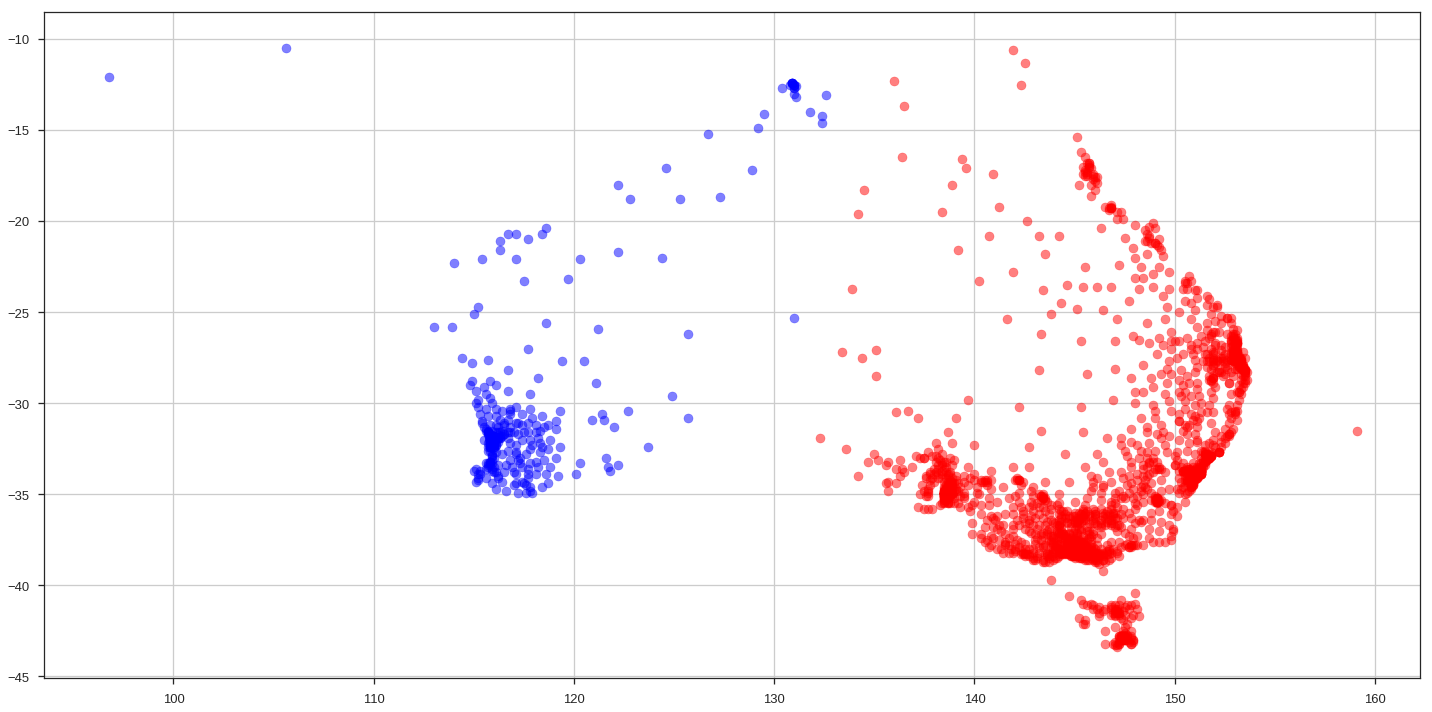

In [371]:


df_1=cluster_df[cluster_df["N2"] == 0]
df_2=cluster_df[cluster_df["N2"] == 1]



fig, ax = plt.subplots()
df_1

ax.scatter(df_1.Longitude, df_1.Latitude, c="r", alpha=0.5,)
ax.scatter(df_2.Longitude, df_2.Latitude, c="b", alpha=0.5,)


ax.grid(True)
fig.tight_layout()

plt.show()

In [372]:
def kcluster(n):
    model = KMeans(n_clusters=n)
    n2 = model.fit_predict(skPairs)
    n2series = pd.Series(n2.astype(int))
    cluster_df["N"+str(n)] = n2series.values
 

In [373]:
# kcluster(3)
# kcluster(4)
# kcluster(5)
# kcluster(6)
# kcluster(7)
# kcluster(8)

In [374]:
for x in range (2,9):
    kcluster(x)


In [375]:
cluster_df

,Longitude,Latitude,N2,N3,N4,N5,N6,N7,N8
0,130.8,-12.5,1,1,3,4,5,4,7
1,130.9,-12.4,1,1,3,4,5,4,7
2,130.9,-12.4,1,1,3,4,5,4,7
3,130.9,-12.4,1,1,3,4,5,4,7
4,129.5,-14.1,1,1,3,4,5,4,7
5,130.9,-12.4,1,1,3,4,5,4,7
6,130.9,-12.4,1,1,3,4,5,4,7
7,131.0,-12.5,1,1,3,4,5,4,7
8,131.0,-12.5,1,1,3,4,5,4,7
9,131.0,-12.5,1,1,3,4,5,4,7


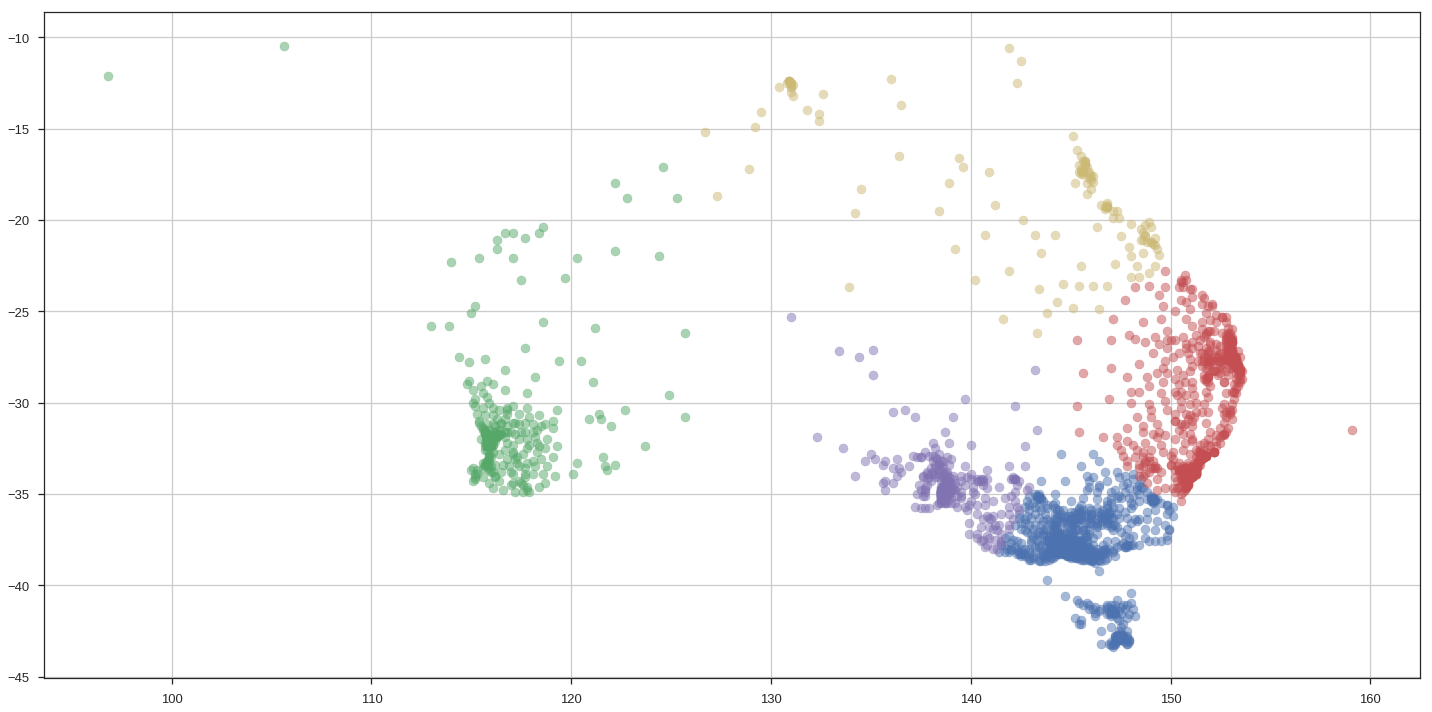

In [376]:
df_1=cluster_df[cluster_df["N5"] == 0]
df_2=cluster_df[cluster_df["N5"] == 1]
df_3=cluster_df[cluster_df["N5"] == 2]
df_4=cluster_df[cluster_df["N5"] == 3]
df_5=cluster_df[cluster_df["N5"] == 4]

fig, ax = plt.subplots()
df_1

ax.scatter(df_1.Longitude, df_1.Latitude,  alpha=0.5,)
ax.scatter(df_2.Longitude, df_2.Latitude,  alpha=0.5,)
ax.scatter(df_3.Longitude, df_3.Latitude,  alpha=0.5,)
ax.scatter(df_4.Longitude, df_4.Latitude,  alpha=0.5,)
ax.scatter(df_5.Longitude, df_5.Latitude,  alpha=0.5,)


ax.grid(True)
fig.tight_layout()

plt.show()

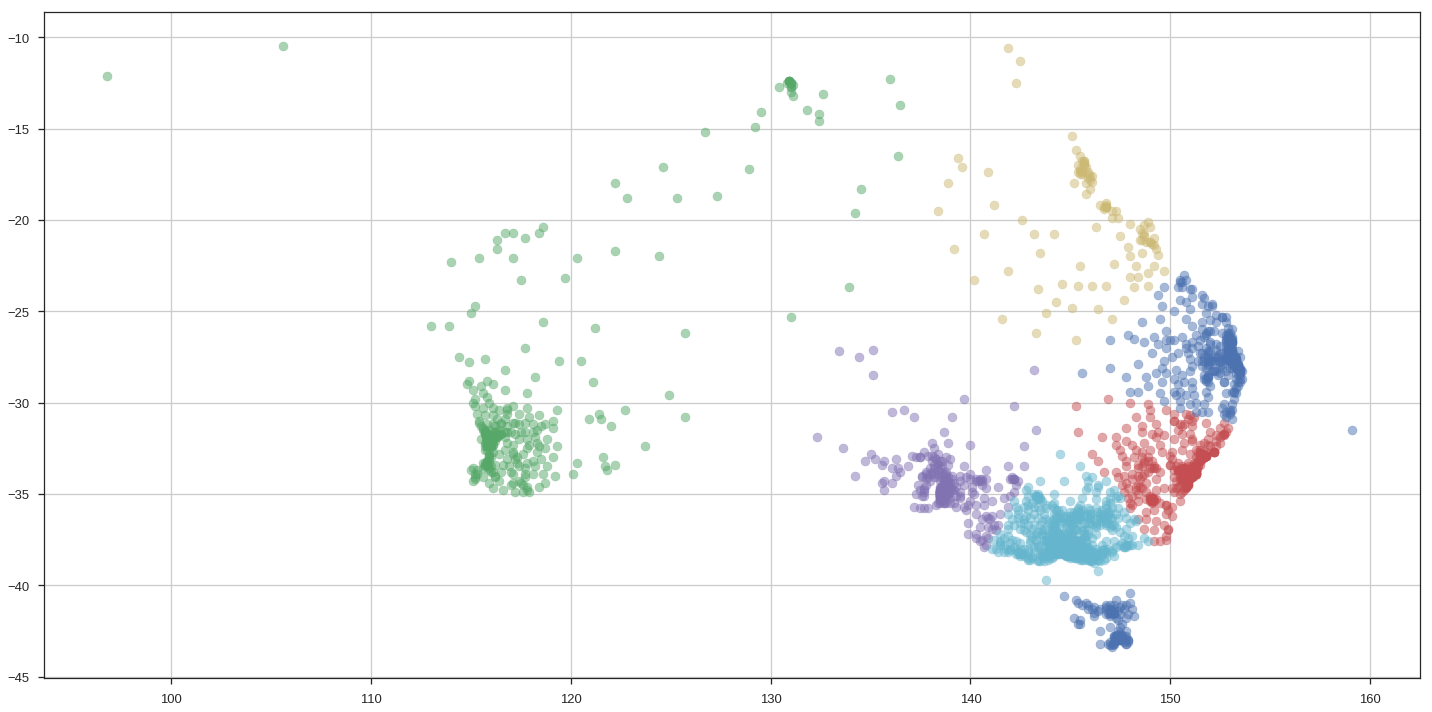

In [377]:
df_1=cluster_df[cluster_df["N8"] == 0]
df_2=cluster_df[cluster_df["N8"] == 1]
df_3=cluster_df[cluster_df["N8"] == 2]
df_4=cluster_df[cluster_df["N8"] == 3]
df_5=cluster_df[cluster_df["N8"] == 4]
df_6=cluster_df[cluster_df["N8"] == 5]
df_7=cluster_df[cluster_df["N8"] == 6]
df_8=cluster_df[cluster_df["N8"] == 7]

fig, ax = plt.subplots()
df_1

ax.scatter(df_1.Longitude, df_1.Latitude,  alpha=0.5,)
ax.scatter(df_2.Longitude, df_2.Latitude,  alpha=0.5,)
ax.scatter(df_3.Longitude, df_3.Latitude,  alpha=0.5,)
ax.scatter(df_4.Longitude, df_4.Latitude,  alpha=0.5,)
ax.scatter(df_5.Longitude, df_5.Latitude,  alpha=0.5,)
ax.scatter(df_6.Longitude, df_6.Latitude,  alpha=0.5,)
ax.scatter(df_7.Longitude, df_7.Latitude,  alpha=0.5,)
ax.scatter(df_8.Longitude, df_8.Latitude,  alpha=0.5,)


ax.grid(True)
fig.tight_layout()

plt.show()

In [378]:
cluster_df["geometry"] = gp_airdf["geometry"]
gp_cluster = gp.GeoDataFrame(cluster_df)

In [379]:
gp_cluster


,Longitude,Latitude,N2,N3,N4,N5,N6,N7,N8,geometry
0,130.8,-12.5,1,1,3,4,5,4,7,"POLYGON ((130.834539712 -12.45798405399995, 13..."
1,130.9,-12.4,1,1,3,4,5,4,7,POLYGON ((130.8471142530001 -12.37754403699995...
2,130.9,-12.4,1,1,3,4,5,4,7,POLYGON ((130.8919169080001 -12.36878576699996...
3,130.9,-12.4,1,1,3,4,5,4,7,"POLYGON ((130.834991691 -12.43006229899993, 13..."
4,129.5,-14.1,1,1,3,4,5,4,7,(POLYGON ((130.8775887600001 -12.5574015179999...
5,130.9,-12.4,1,1,3,4,5,4,7,POLYGON ((130.9177149990001 -12.43136899199993...
6,130.9,-12.4,1,1,3,4,5,4,7,POLYGON ((130.9831979700001 -12.46799708599997...
7,131.0,-12.5,1,1,3,4,5,4,7,"(POLYGON ((130.944818402 -12.52677099399995, 1..."
8,131.0,-12.5,1,1,3,4,5,4,7,"POLYGON ((130.988248913 -12.48939287299993, 13..."
9,131.0,-12.5,1,1,3,4,5,4,7,POLYGON ((131.0514998360001 -12.45416805899993...


In [380]:
Kstates = range(8)
KstateC = {0 : "gold", 
              1 : "lightskyblue", 
              2 : "blue", 
              3 : "maroon", 
              4 : "r", 
              5 : "k", 
              6 : "g", 
              7 : "orange"}
Kstate_vector = gp_cluster["N8"]


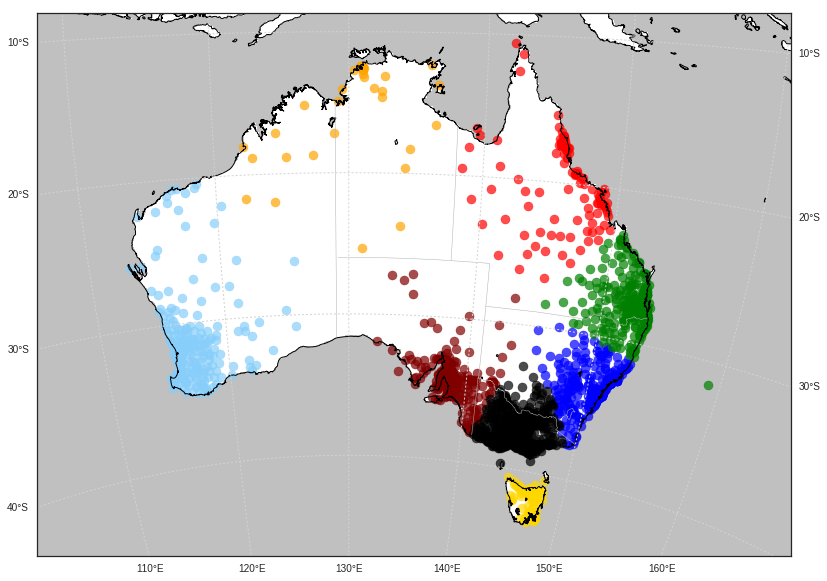

In [ ]:

m = Basemap(llcrnrlon=lonmin, llcrnrlat=latmin, 
    urcrnrlon=lonmax, urcrnrlat=latmax, resolution='i',
    lat_0=latmid, lon_0=lonmid, 
    area_thresh=100.,projection='tmerc')


x = gp_cluster["Longitude"]
y = gp_cluster["Latitude"]

m.drawlsmask(land_color='none',ocean_color='silver',lakes=True)


for state in Kstates:
    sx = x[Kstate_vector==state]
    sy = y[Kstate_vector==state]
    sx = sx.tolist()
    sy = sy.tolist()
    mx, my = m(sx, sy)
    m.scatter(mx,my,color=KstateC[state], alpha = 0.7)

coast = m.drawcoastlines()
m.drawstates(color='0.7')
merid = m.drawmeridians(
    np.arange(-180, 180, 10), color="lightgrey",
    labels=[False, False, False, True])
parall = m.drawparallels(
    np.arange(-50, 0, 10), labels=[True, True, False, False], color="lightgrey")



In [ ]:
ch = dict(column='N8', linewidth=0, cmap = 'rainbow')
gp_cluster.plot(**ch)